### EDA on Breast Cancer Dataset

In [2]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### PHASE 2: Exploratory Data Analysis(EDA)

In [3]:
# Load the cleaned data set
breast_cancer_df = pd.read_csv('cleaned_breast_cancer_dataset.csv')

In [4]:
# Set the case id as the index
breast_cancer_df.set_index("id", inplace=True)

In [5]:
# Display the first two rows
breast_cancer_df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


#### Conduct descriptive statistics to summarize the key characteristics of the data

In [6]:
breast_cancer_df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
# Check the desciptive summary of the dataset
breast_cancer_df.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000
fractal_dimension_mean,569.000000,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.097440


##### What  does our data tell us
##### Features

The features include measurement statistics for:

- Radius, Texture, Perimeter, Area

- Smoothness, Compactness, Concavity

- Symmetry, Fractal dimension

Each measured as:

- Mean

- Standard Error (_se)

- Worst (_worst)


In [8]:
# Extract the numerical columns
num_cols = breast_cancer_df.select_dtypes('number')

In [9]:
num_cols.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
# Extract the Categorical column(s)
cat_cols = [x for x in breast_cancer_df.columns if x not in num_cols]

In [11]:
# View the categorical column(s)
cat_cols

['diagnosis']

In [12]:
# Define a function to check the statistical summary
def univariate_numerical__eda(df, column):
    """
    Perform univariate EDA on each numerical columns.
    Display the skewness, kurtosis, histogram, KDE and boxplot
    """
    print(f"\nFeature: {column}")
    print("-" * 40)
    print(f"Skewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")

    plt.figure(figsize=(12,6))

    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"\nDistribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"\nBox plot of {column}", fontsize=13)
    plt.tight_layout()
    plt.show()

    # Transformation
    if abs(df[column].skew()) > 1:
        print(f"\n{column} is highly skewed, consider log transformation or Box-cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"\n{column} is moderately skewed")
    else:
        print(f"\n{column} is fairly symmetric")


Feature: radius_mean
----------------------------------------
Skewness: 0.942
Kurtosis: 0.846


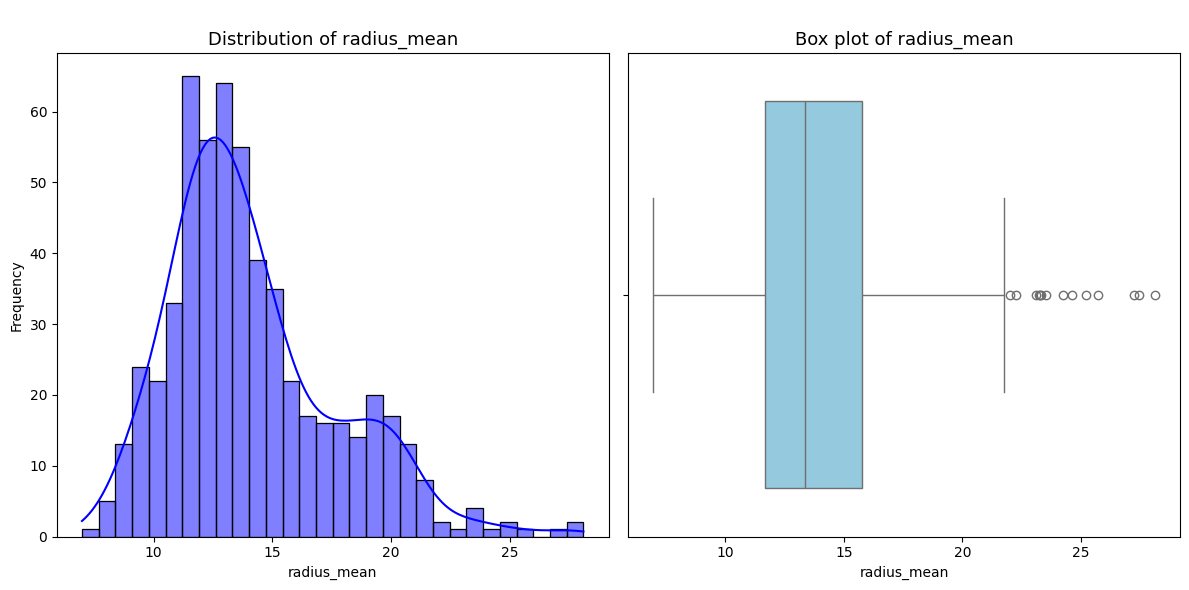


radius_mean is moderately skewed

Feature: texture_mean
----------------------------------------
Skewness: 0.650
Kurtosis: 0.758


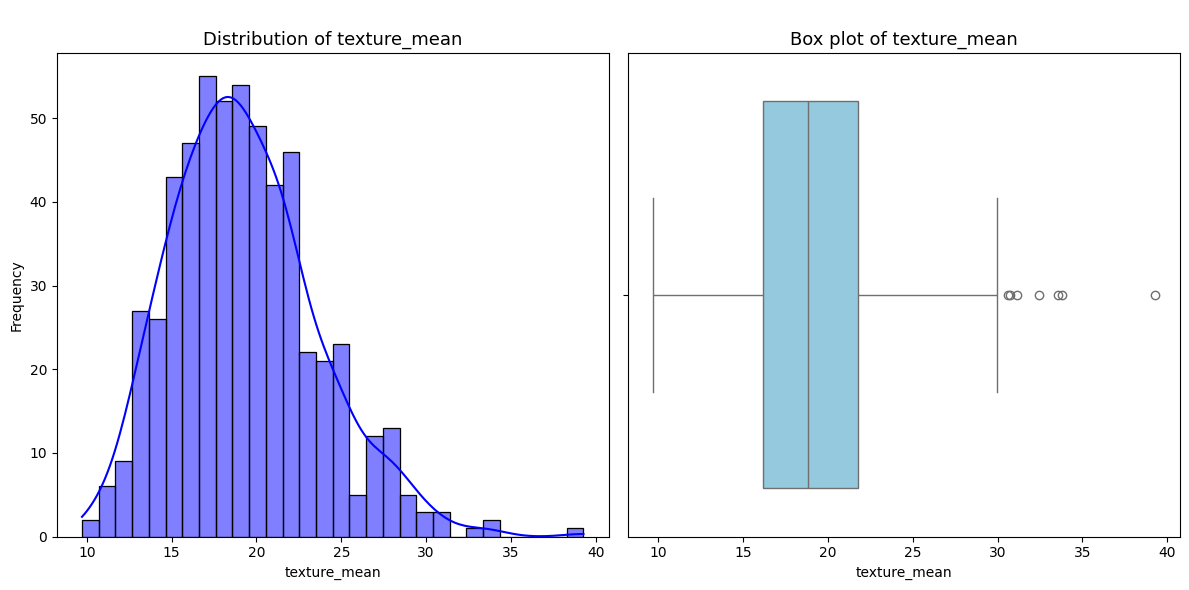


texture_mean is moderately skewed

Feature: perimeter_mean
----------------------------------------
Skewness: 0.991
Kurtosis: 0.972


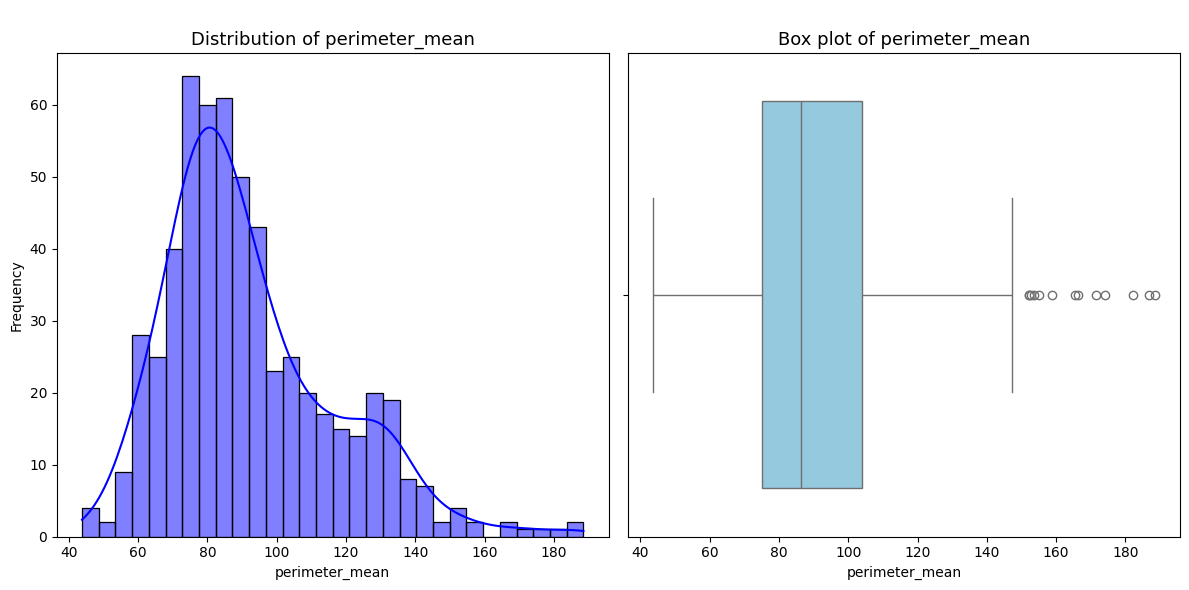


perimeter_mean is moderately skewed

Feature: area_mean
----------------------------------------
Skewness: 1.646
Kurtosis: 3.652


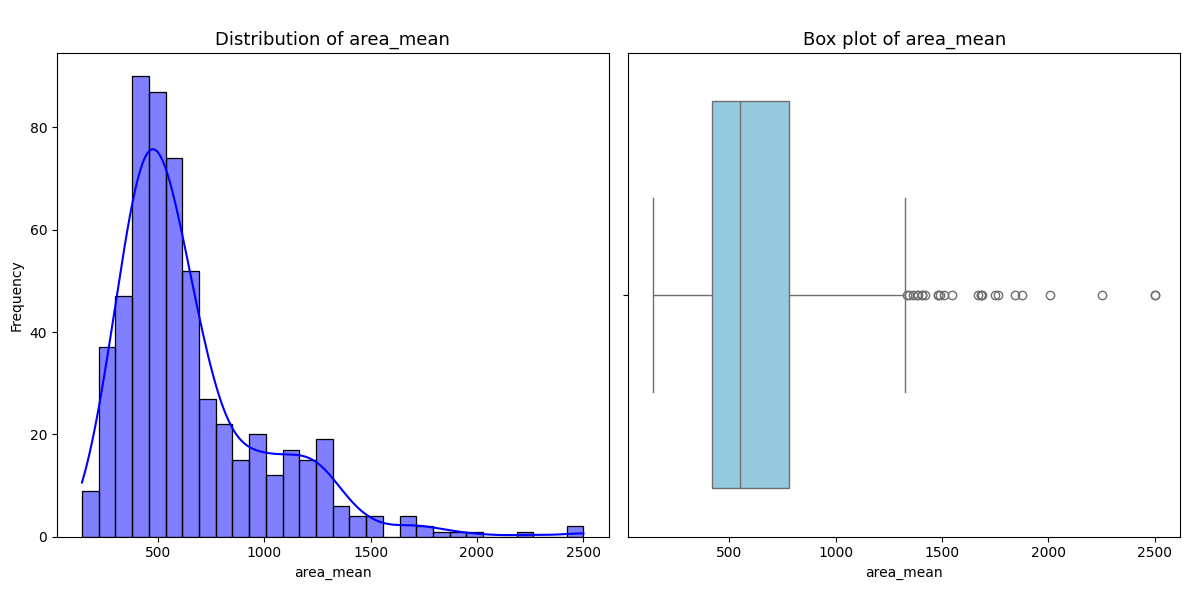


area_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: smoothness_mean
----------------------------------------
Skewness: 0.456
Kurtosis: 0.856


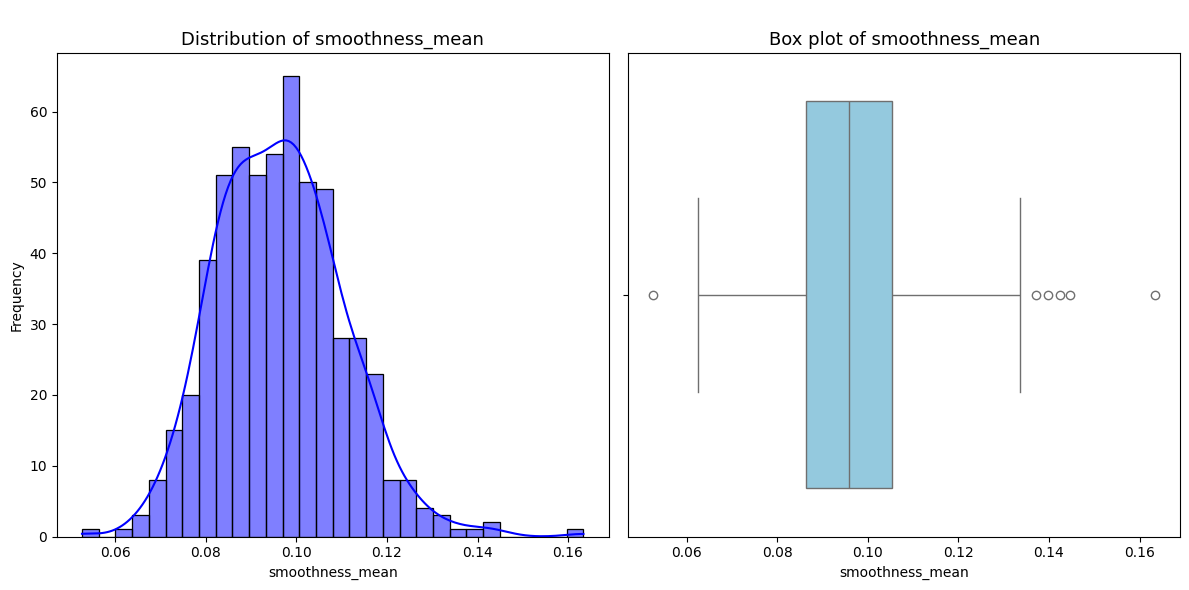


smoothness_mean is fairly symmetric

Feature: compactness_mean
----------------------------------------
Skewness: 1.190
Kurtosis: 1.650


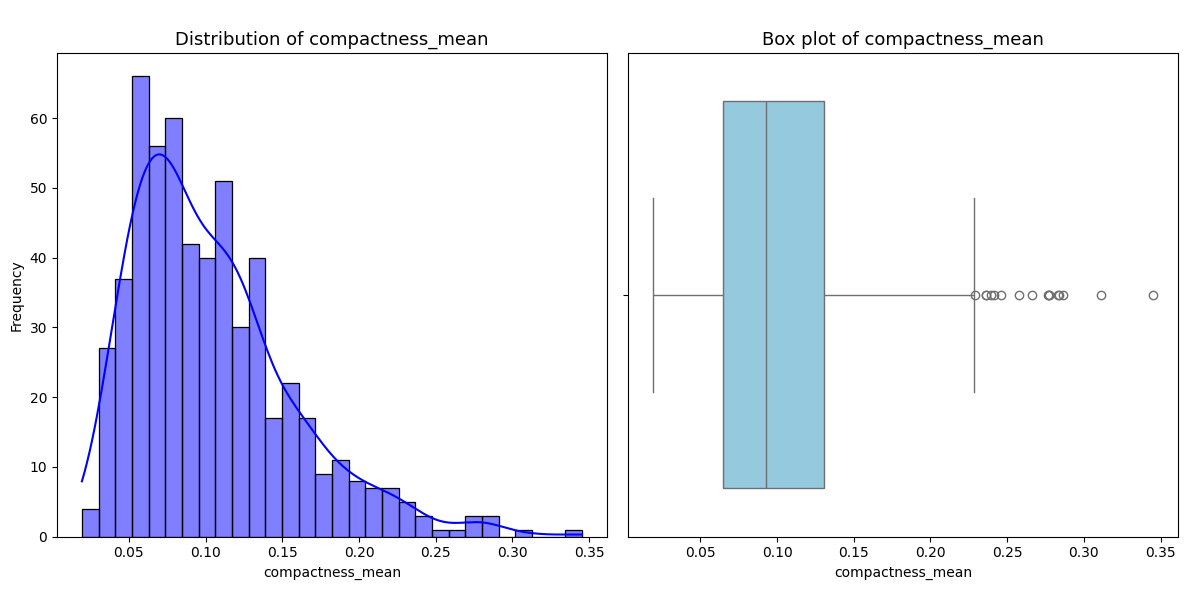


compactness_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: concavity_mean
----------------------------------------
Skewness: 1.401
Kurtosis: 1.999


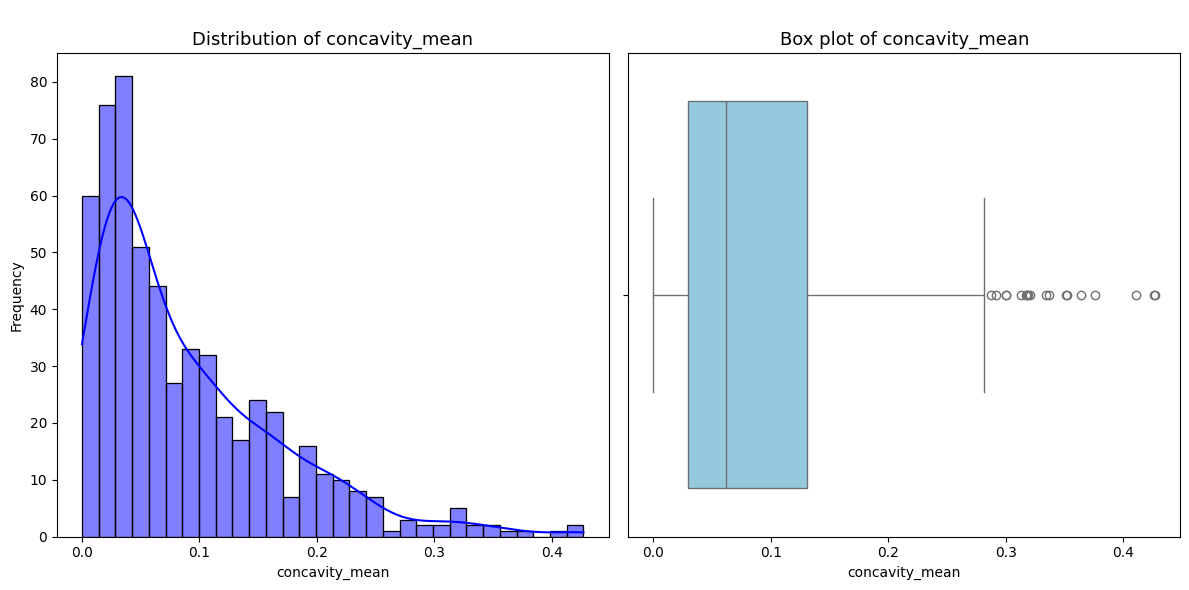


concavity_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: concave points_mean
----------------------------------------
Skewness: 1.171
Kurtosis: 1.067


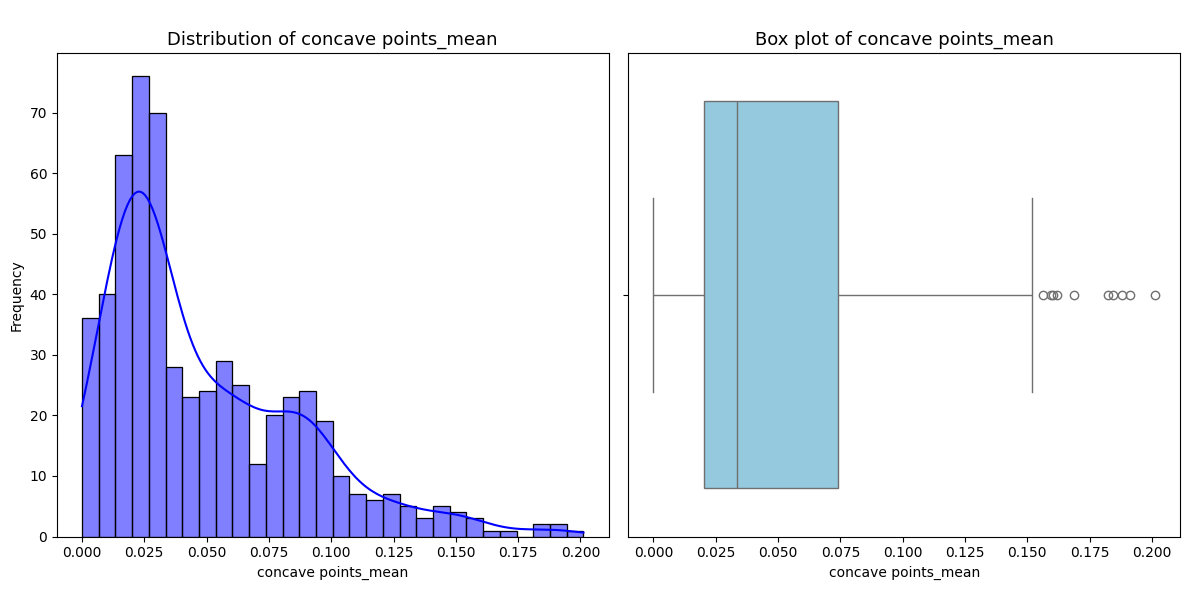


concave points_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: symmetry_mean
----------------------------------------
Skewness: 0.726
Kurtosis: 1.288


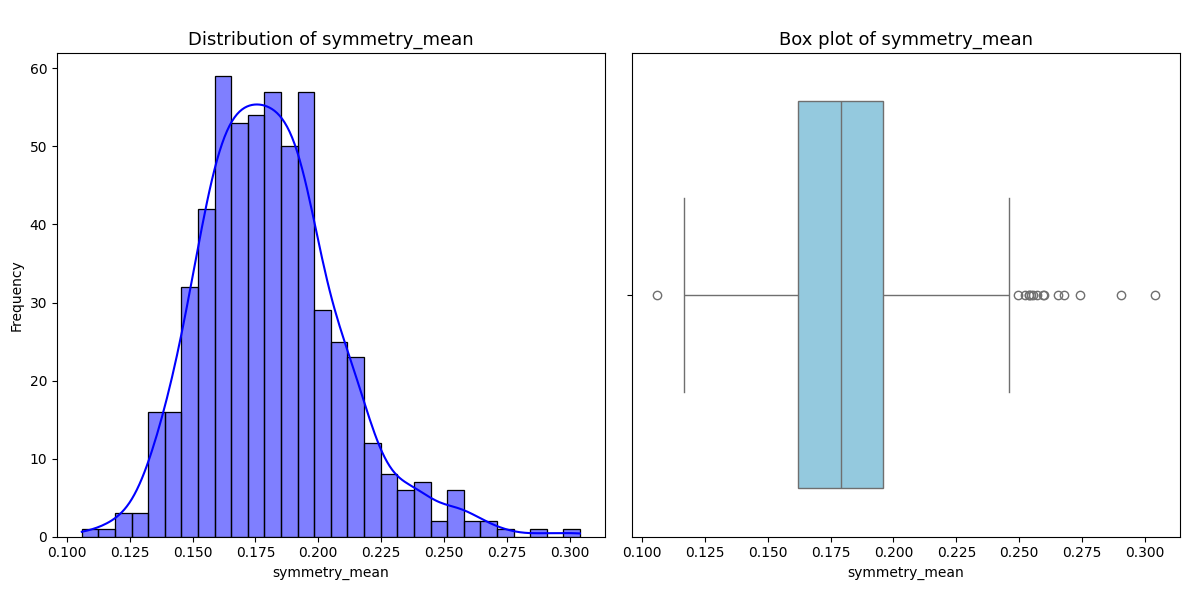


symmetry_mean is moderately skewed

Feature: fractal_dimension_mean
----------------------------------------
Skewness: 1.304
Kurtosis: 3.006


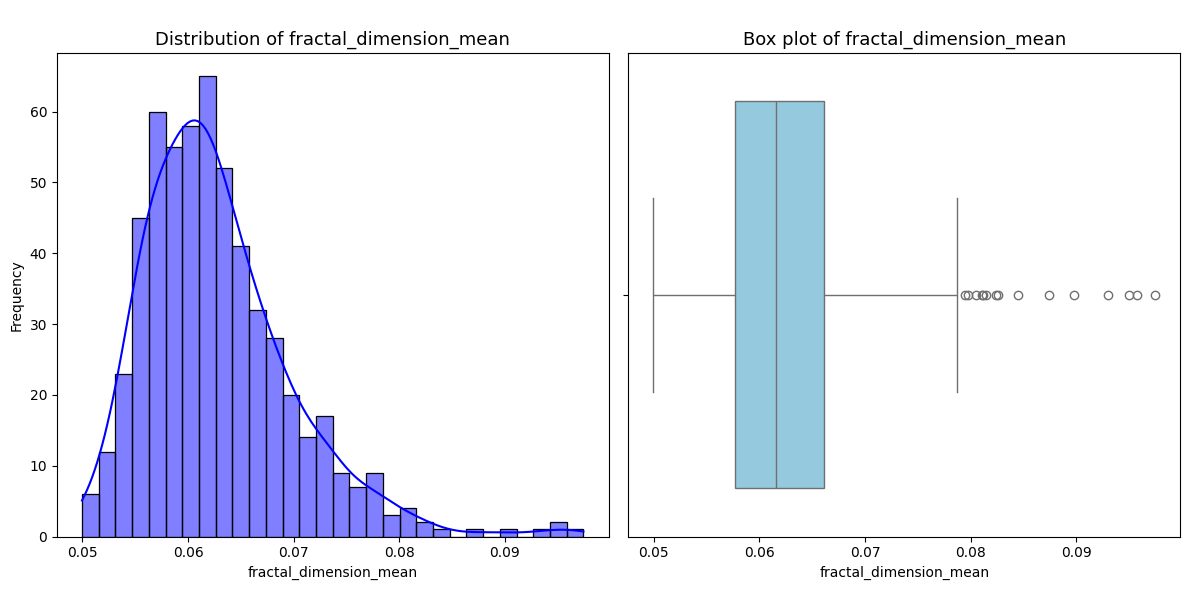


fractal_dimension_mean is highly skewed, consider log transformation or Box-cox transformation.

Feature: radius_se
----------------------------------------
Skewness: 3.089
Kurtosis: 17.687


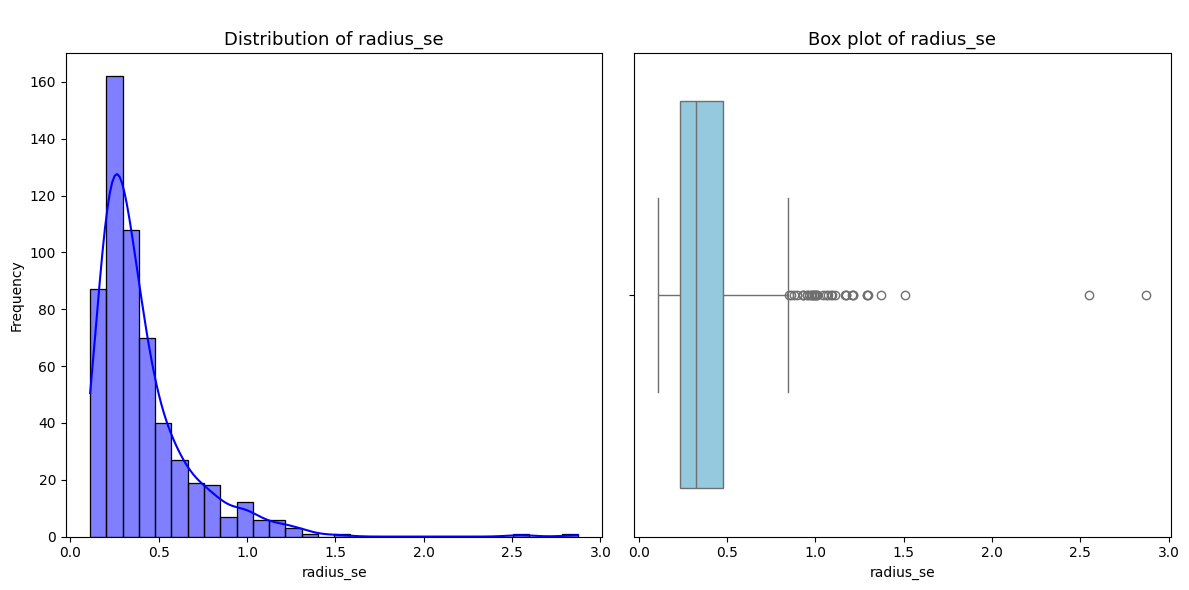


radius_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: texture_se
----------------------------------------
Skewness: 1.646
Kurtosis: 5.349


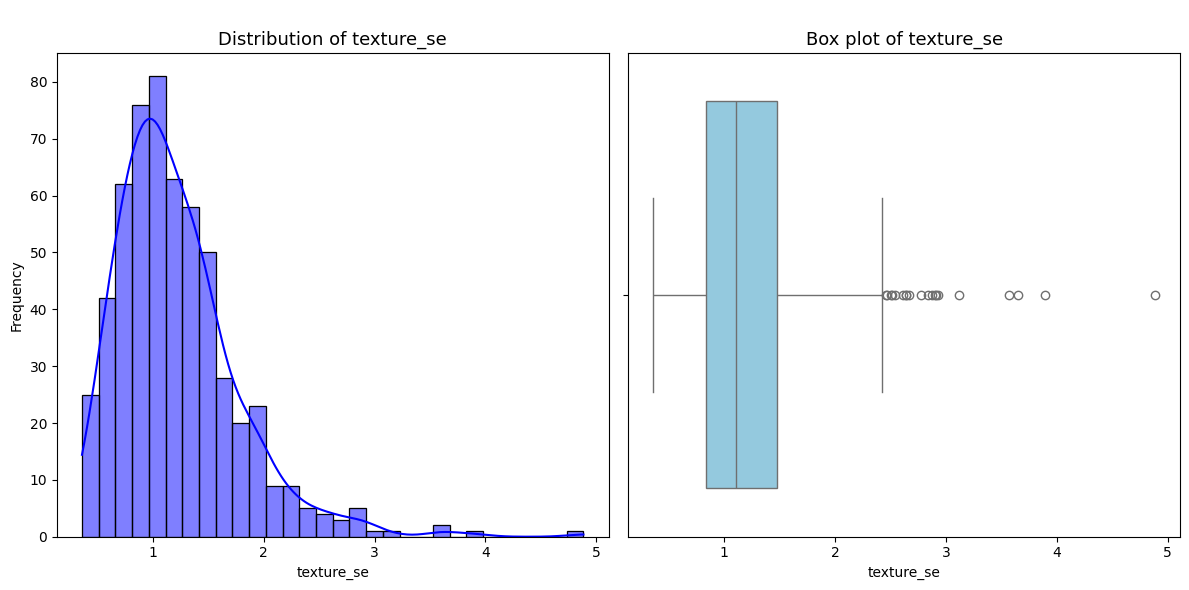


texture_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: perimeter_se
----------------------------------------
Skewness: 3.444
Kurtosis: 21.402


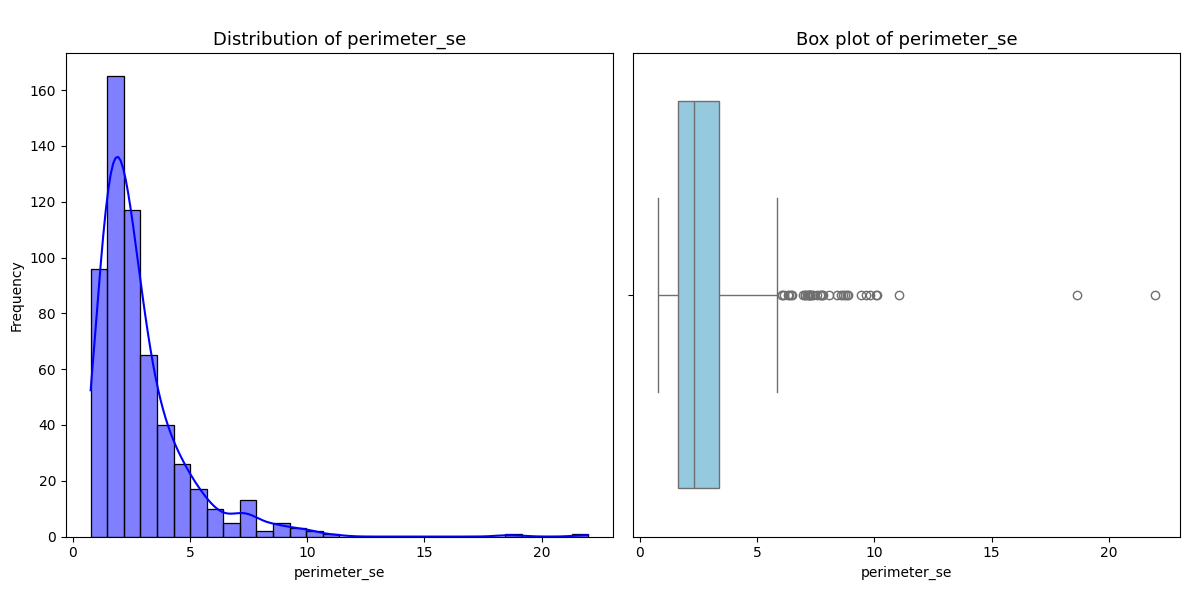


perimeter_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: area_se
----------------------------------------
Skewness: 5.447
Kurtosis: 49.209


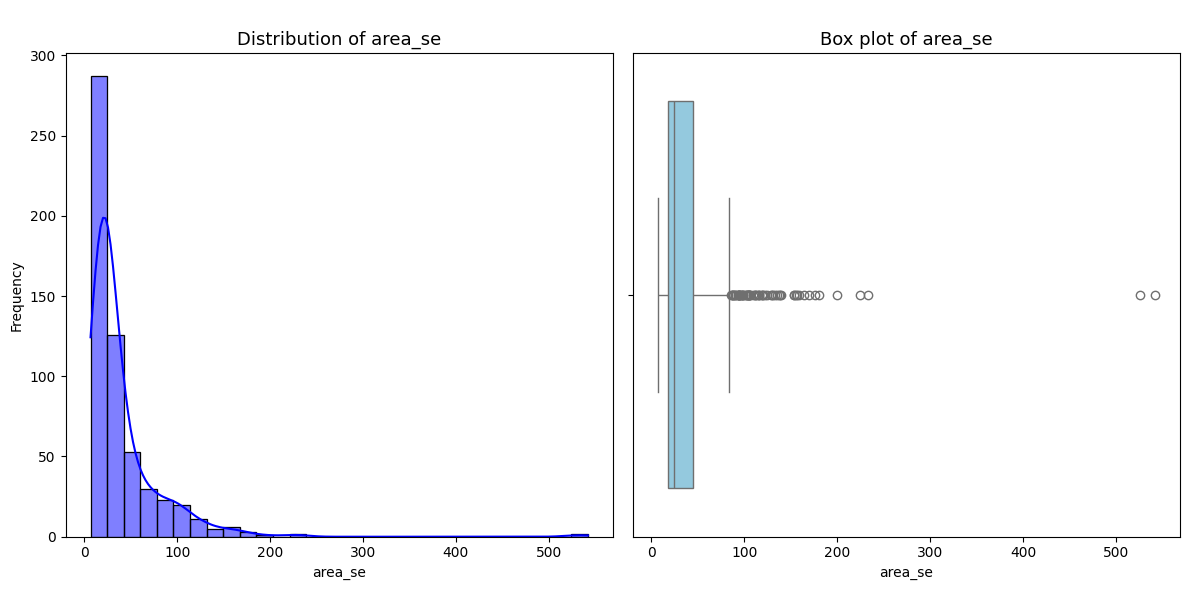


area_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: smoothness_se
----------------------------------------
Skewness: 2.314
Kurtosis: 10.470


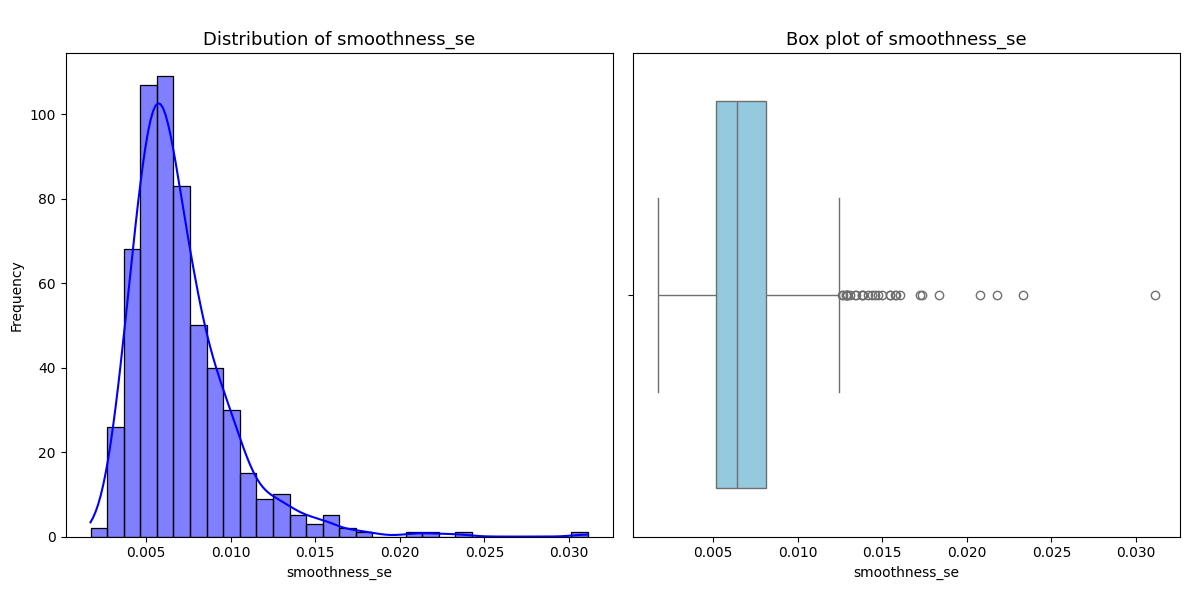


smoothness_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: compactness_se
----------------------------------------
Skewness: 1.902
Kurtosis: 5.106


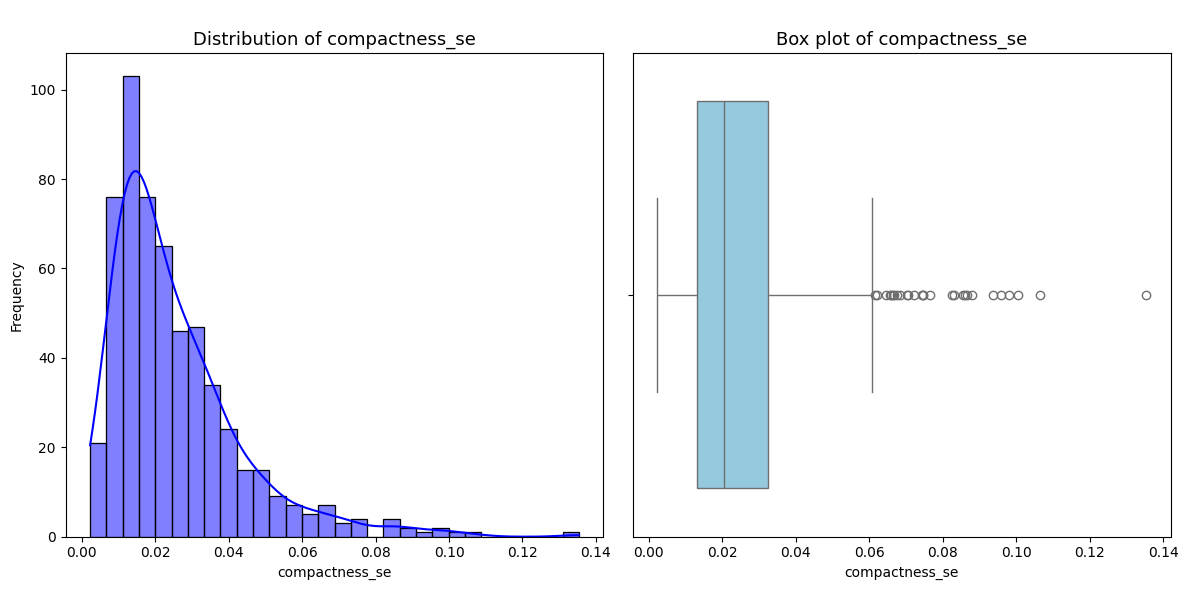


compactness_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: concavity_se
----------------------------------------
Skewness: 5.110
Kurtosis: 48.861


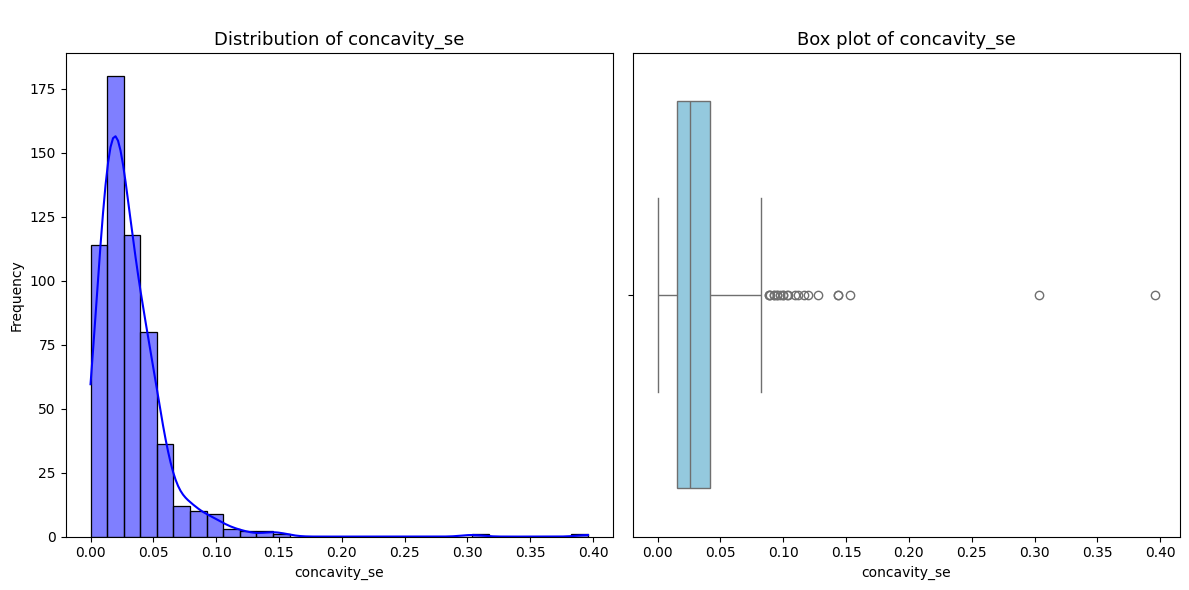


concavity_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: concave points_se
----------------------------------------
Skewness: 1.445
Kurtosis: 5.126


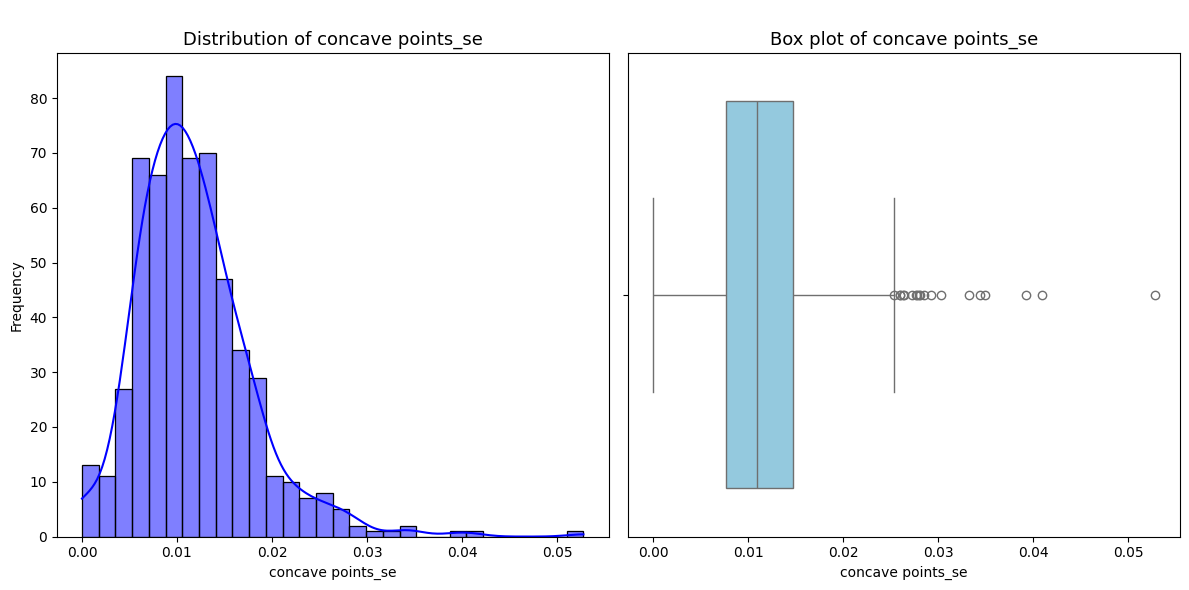


concave points_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: symmetry_se
----------------------------------------
Skewness: 2.195
Kurtosis: 7.896


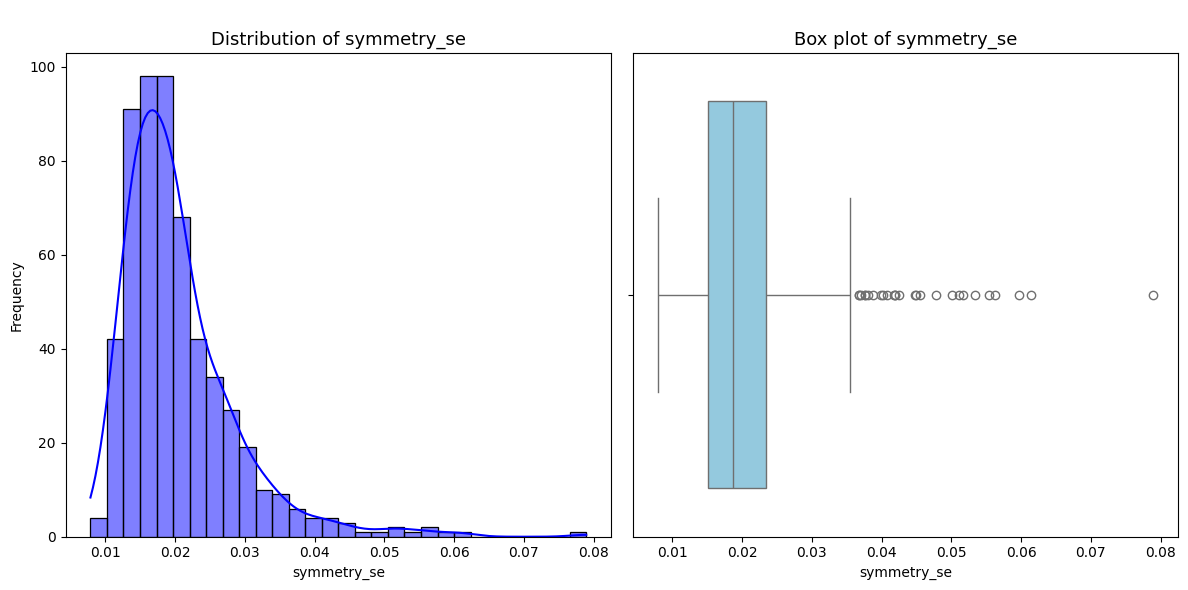


symmetry_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: fractal_dimension_se
----------------------------------------
Skewness: 3.924
Kurtosis: 26.281


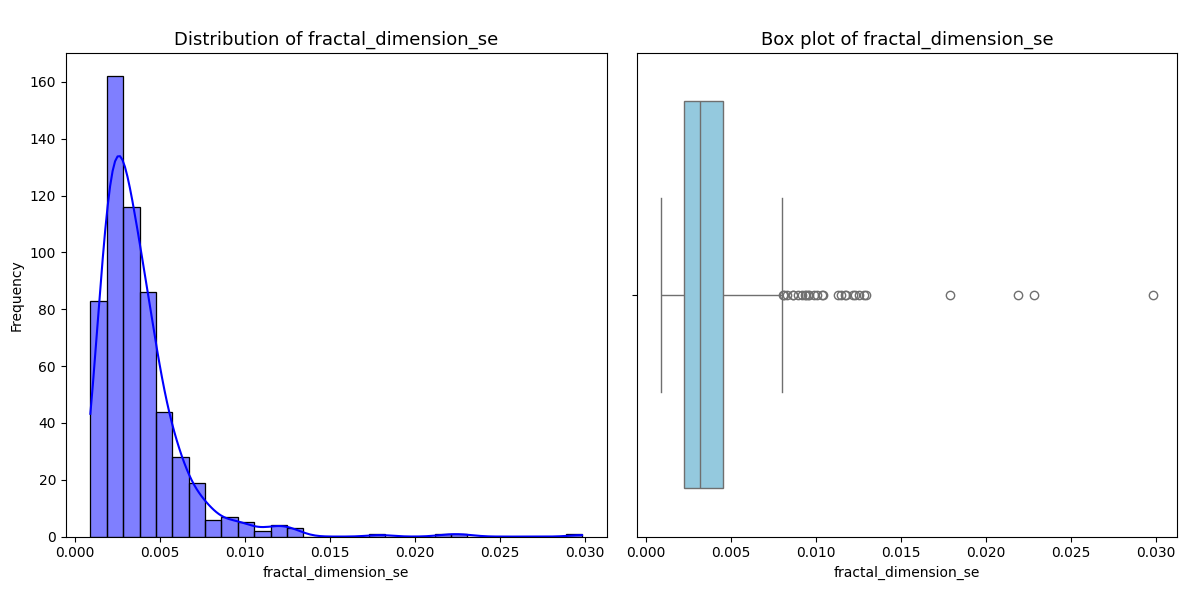


fractal_dimension_se is highly skewed, consider log transformation or Box-cox transformation.

Feature: radius_worst
----------------------------------------
Skewness: 1.103
Kurtosis: 0.944


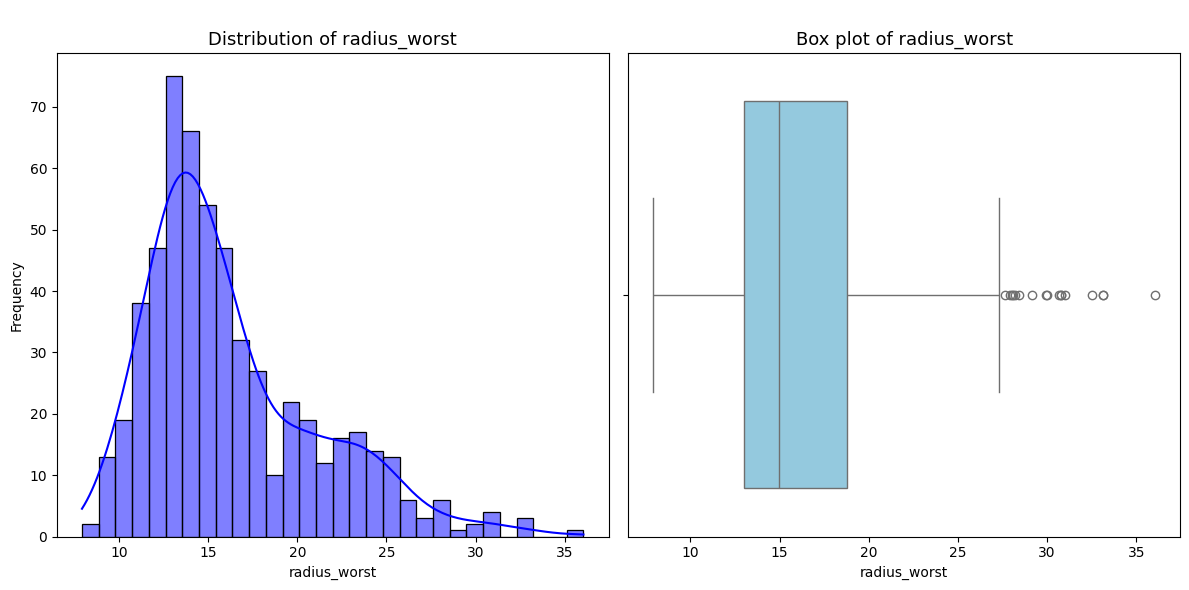


radius_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: texture_worst
----------------------------------------
Skewness: 0.498
Kurtosis: 0.224


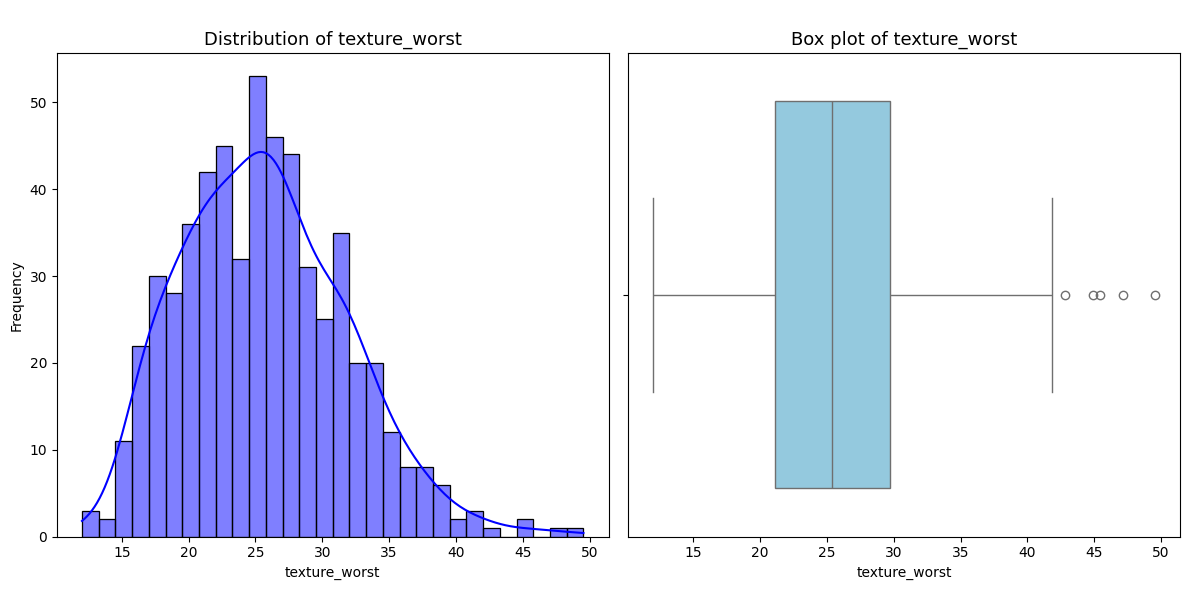


texture_worst is fairly symmetric

Feature: perimeter_worst
----------------------------------------
Skewness: 1.128
Kurtosis: 1.070


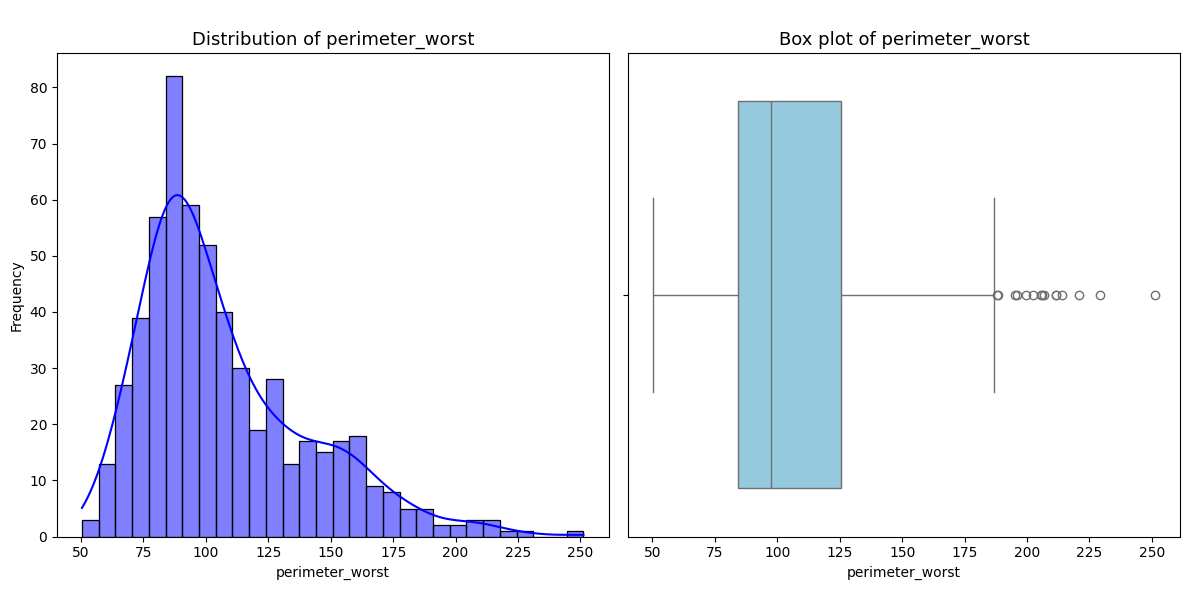


perimeter_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: area_worst
----------------------------------------
Skewness: 1.859
Kurtosis: 4.396


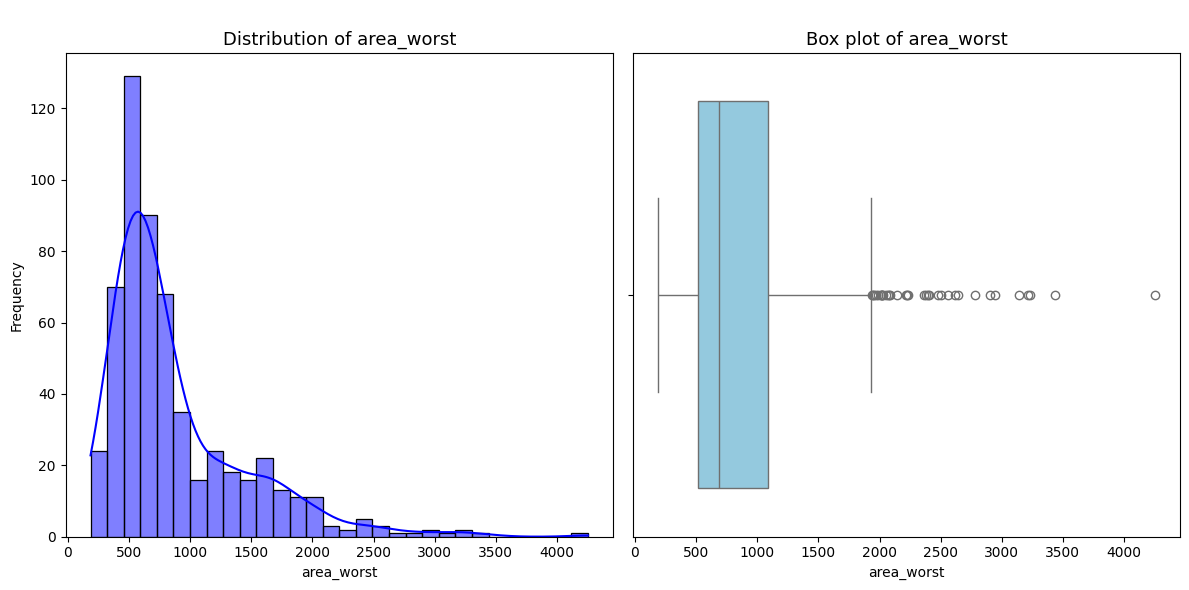


area_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: smoothness_worst
----------------------------------------
Skewness: 0.415
Kurtosis: 0.518


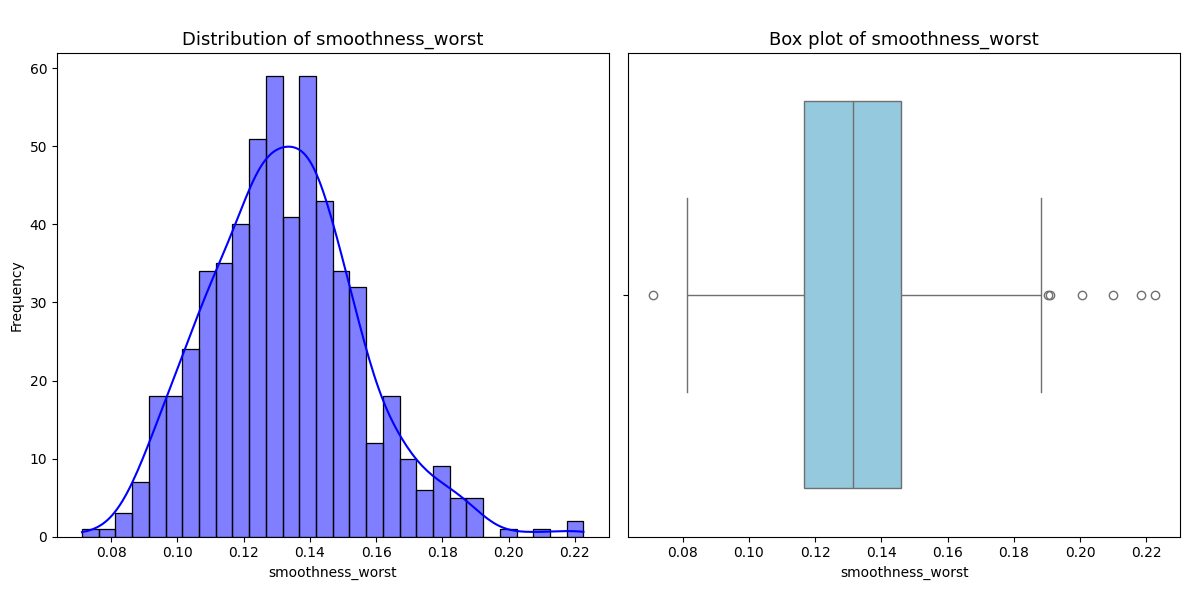


smoothness_worst is fairly symmetric

Feature: compactness_worst
----------------------------------------
Skewness: 1.474
Kurtosis: 3.039


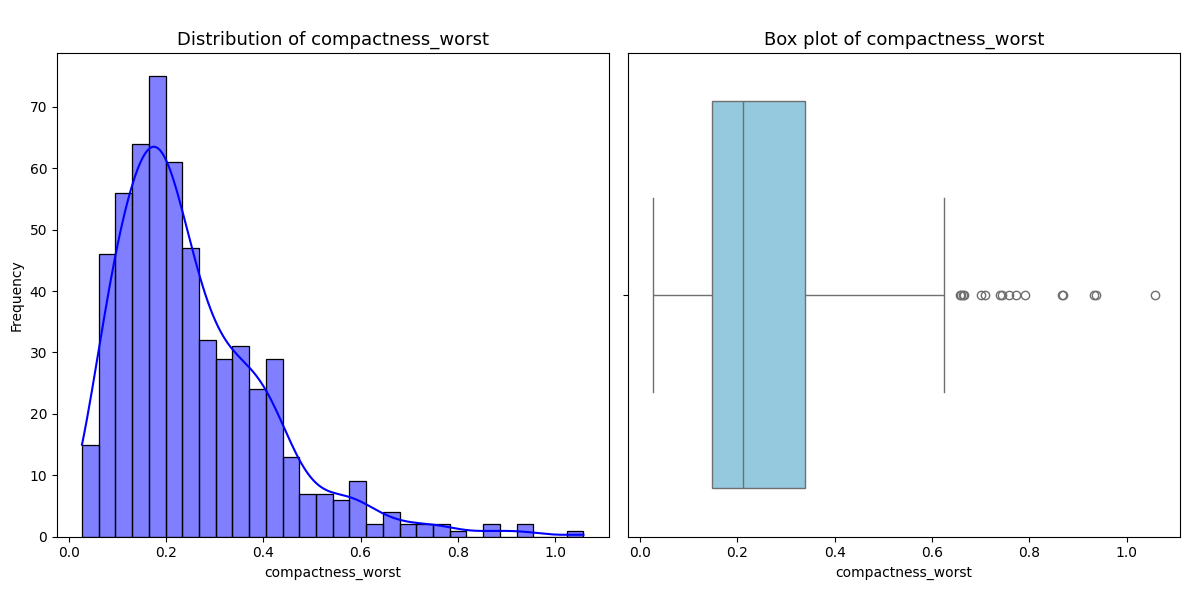


compactness_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: concavity_worst
----------------------------------------
Skewness: 1.150
Kurtosis: 1.615


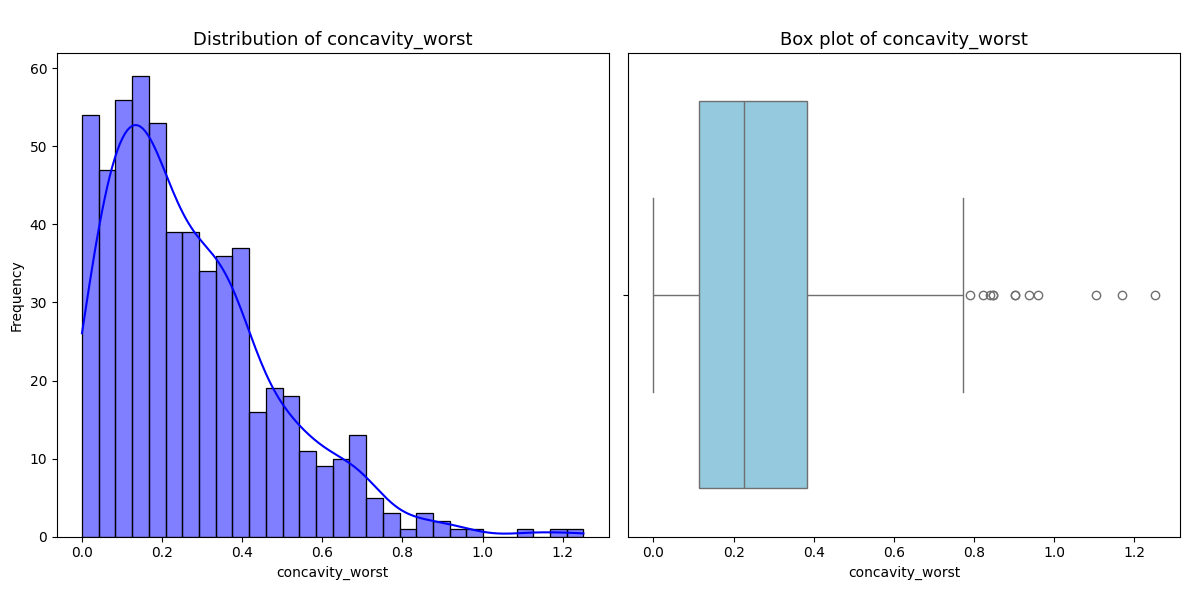


concavity_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: concave points_worst
----------------------------------------
Skewness: 0.493
Kurtosis: -0.536


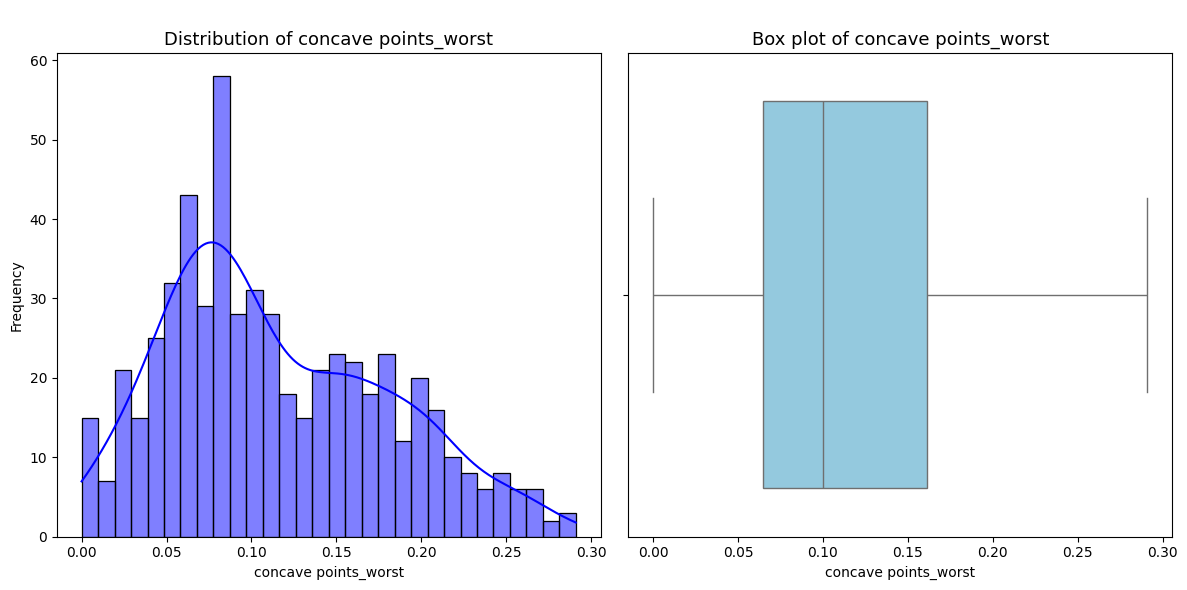


concave points_worst is fairly symmetric

Feature: symmetry_worst
----------------------------------------
Skewness: 1.434
Kurtosis: 4.445


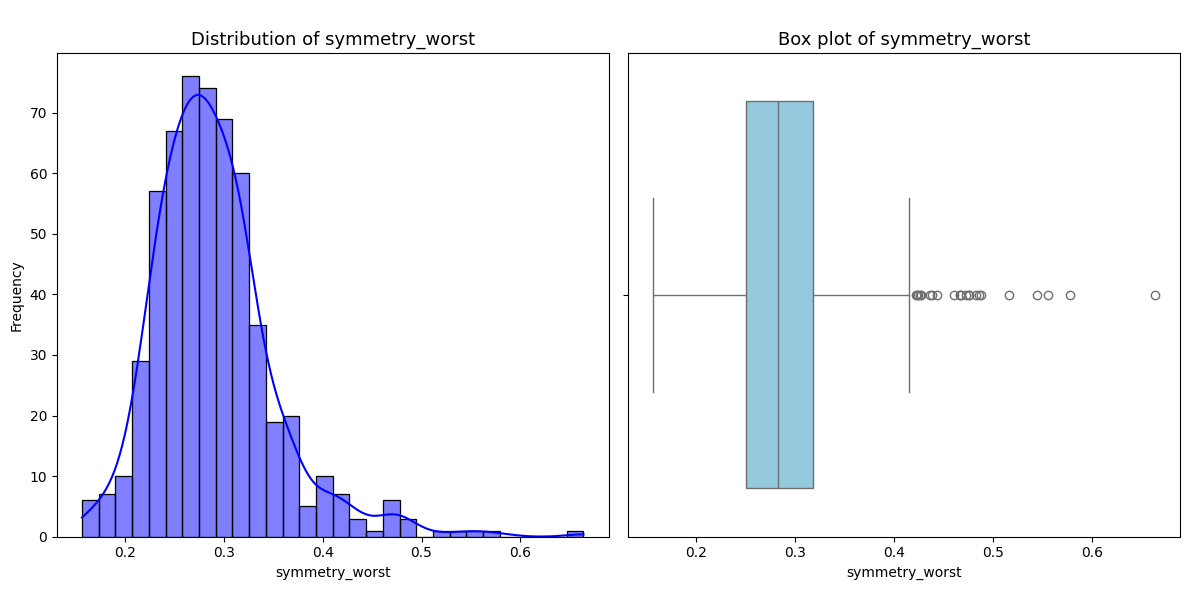


symmetry_worst is highly skewed, consider log transformation or Box-cox transformation.

Feature: fractal_dimension_worst
----------------------------------------
Skewness: 1.663
Kurtosis: 5.245


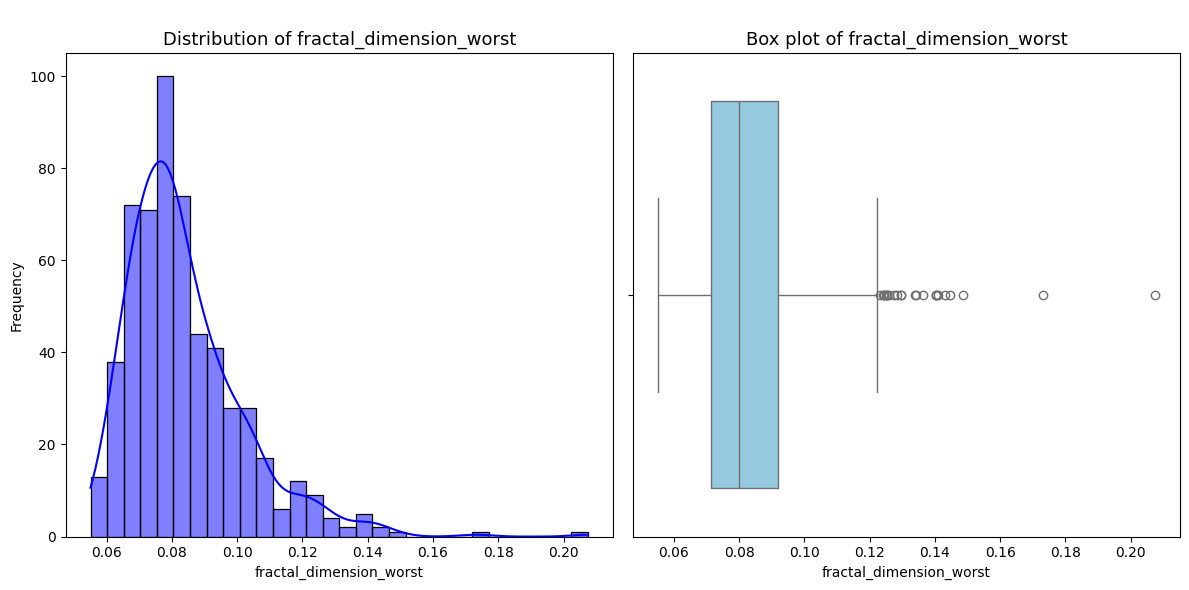


fractal_dimension_worst is highly skewed, consider log transformation or Box-cox transformation.


In [13]:
for col in num_cols:
    univariate_numerical__eda(breast_cancer_df, col)

### Bivariate Analysis

##### Examine the relationship between the features and the target variables(diagnosis)

In [14]:
def bivariate_num_cat(df, feature, target="diagnosis"):
    """
    Plots and summarizes relationship between a numerical and a categorical target
    """
    print(f"Feature: {feature} vs {target}")
    print("="*50)

    #Group summary
    summary = df.groupby(target)[feature].describe()[['mean', 'std', 'min', 'max']]
    print(summary)
    print()

    plt.figure(figsize=(10,5))

    # Boxplot + mean line
    sns.boxplot(x=target, y=feature, data=df, palette="Set2")
    plt.title(f"{feature} across {target} categories", fontsize=13)
    plt.xlabel(target)
    plt.ylabel(feature)
    plt.show()




Feature: radius_mean vs diagnosis
                mean       std     min    max
diagnosis                                    
B          12.146524  1.780512   6.981  17.85
M          17.462830  3.203971  10.950  28.11



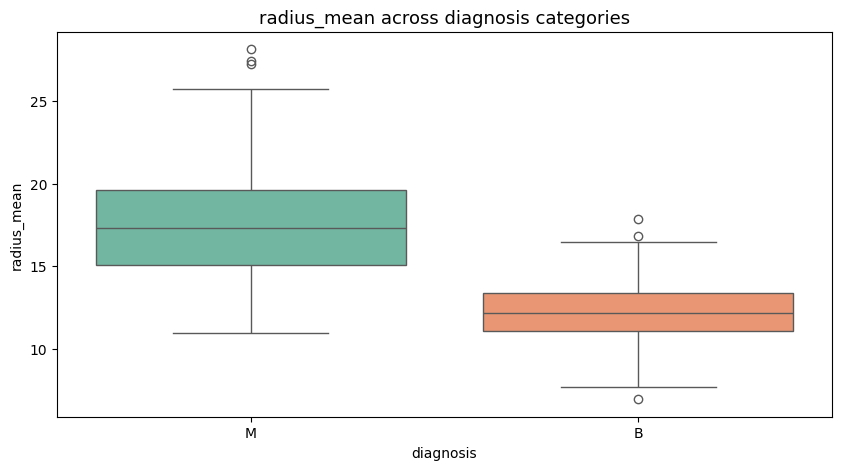

Feature: texture_mean vs diagnosis
                mean       std    min    max
diagnosis                                   
B          17.914762  3.995125   9.71  33.81
M          21.604906  3.779470  10.38  39.28



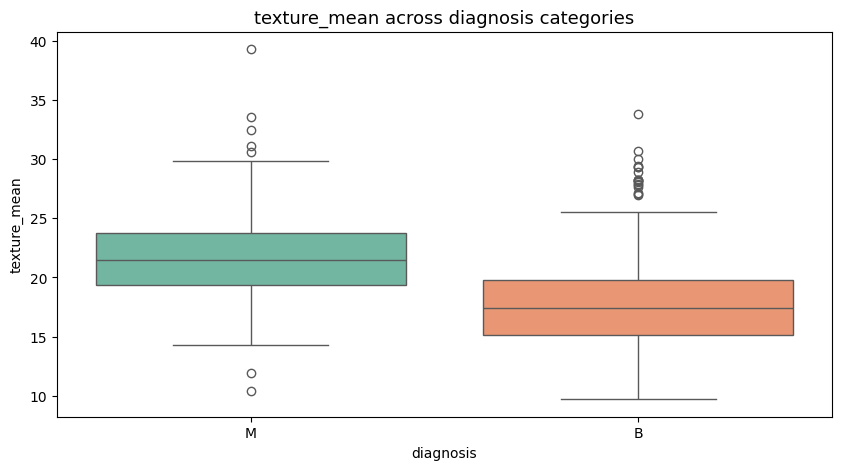

Feature: perimeter_mean vs diagnosis
                 mean        std    min    max
diagnosis                                     
B           78.075406  11.807438  43.79  114.6
M          115.365377  21.854653  71.90  188.5



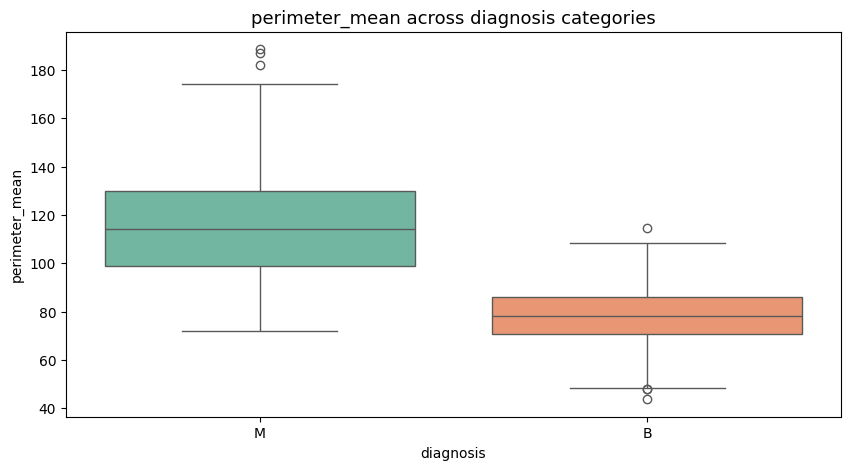

Feature: area_mean vs diagnosis
                 mean         std    min     max
diagnosis                                       
B          462.790196  134.287118  143.5   992.1
M          978.376415  367.937978  361.6  2501.0



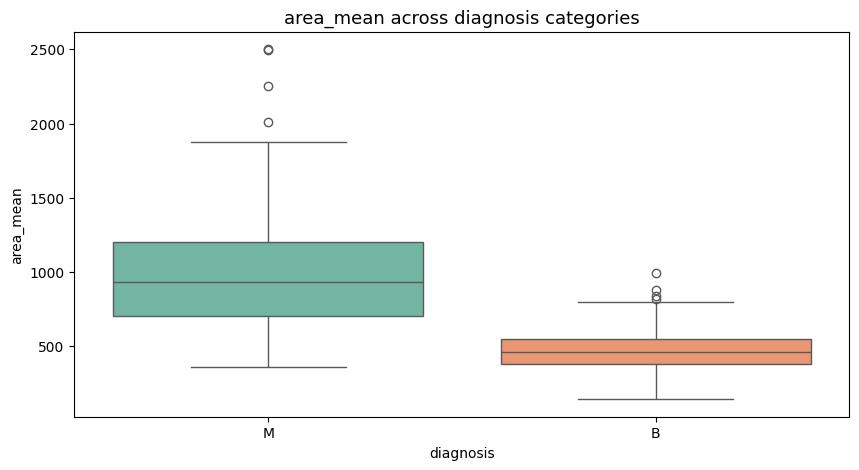

Feature: smoothness_mean vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.092478  0.013446  0.05263  0.1634
M          0.102898  0.012608  0.07371  0.1447



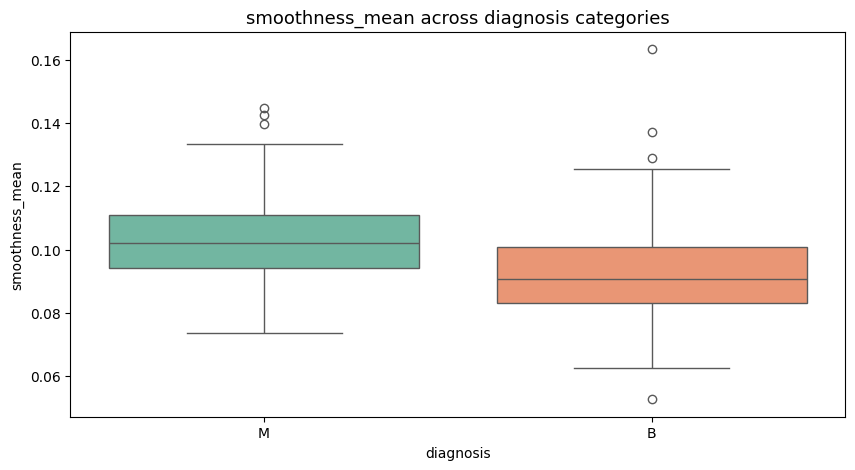

Feature: compactness_mean vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.080085  0.033750  0.01938  0.2239
M          0.145188  0.053987  0.04605  0.3454



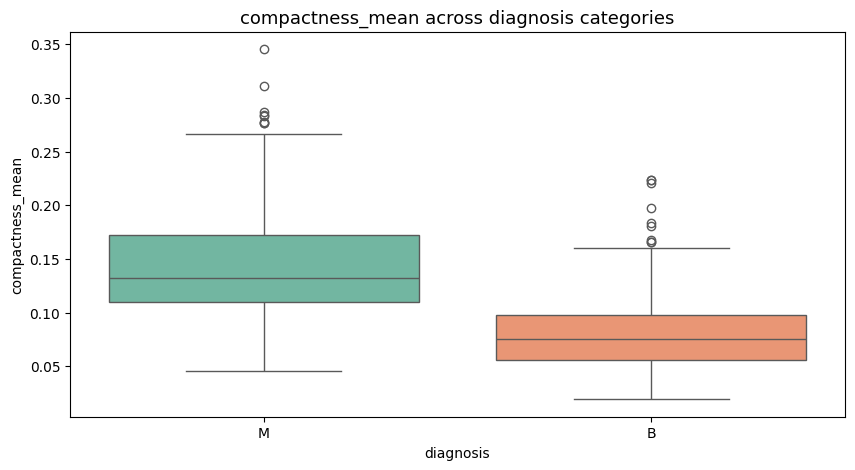

Feature: concavity_mean vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.046058  0.043442  0.00000  0.4108
M          0.160775  0.075019  0.02398  0.4268



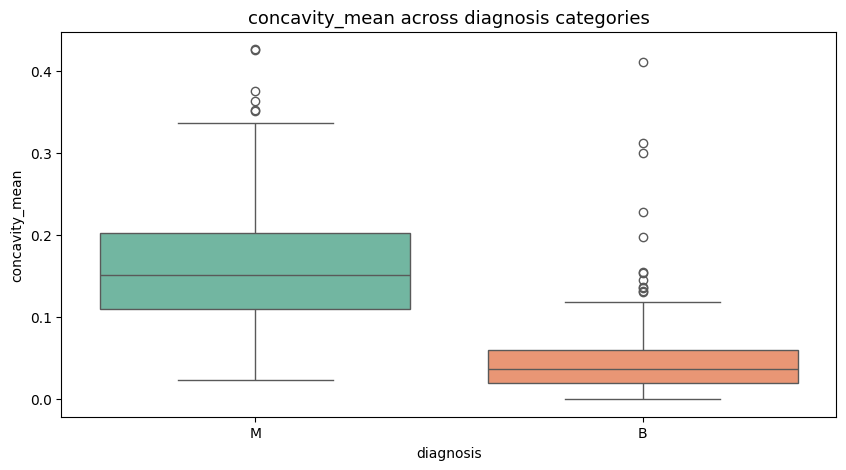

Feature: concave points_mean vs diagnosis
               mean       std      min      max
diagnosis                                      
B          0.025717  0.015909  0.00000  0.08534
M          0.087990  0.034374  0.02031  0.20120



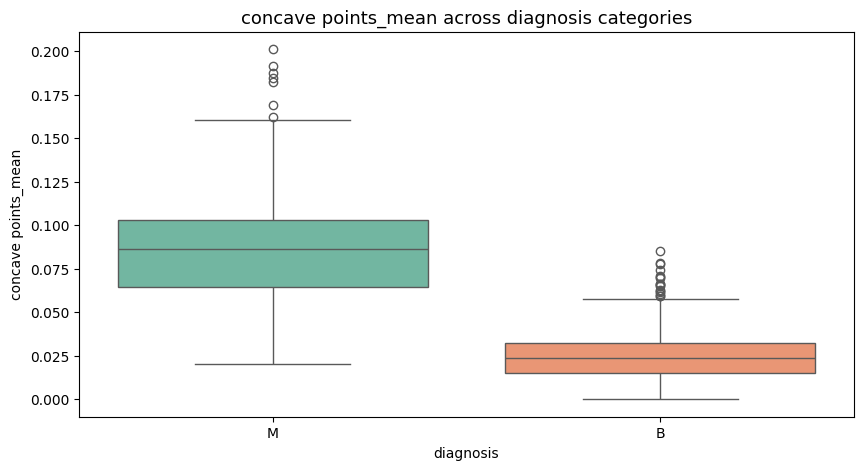

Feature: symmetry_mean vs diagnosis
               mean       std     min     max
diagnosis                                    
B          0.174186  0.024807  0.1060  0.2743
M          0.192909  0.027638  0.1308  0.3040



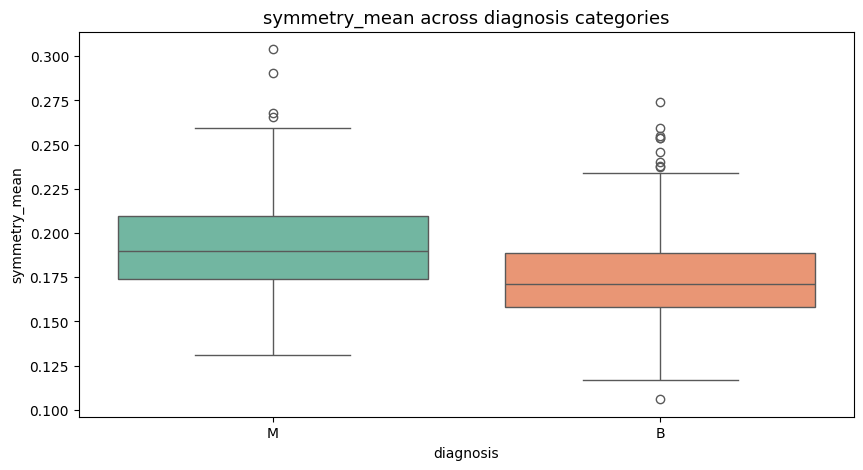

Feature: fractal_dimension_mean vs diagnosis
               mean       std      min      max
diagnosis                                      
B          0.062867  0.006747  0.05185  0.09575
M          0.062680  0.007573  0.04996  0.09744



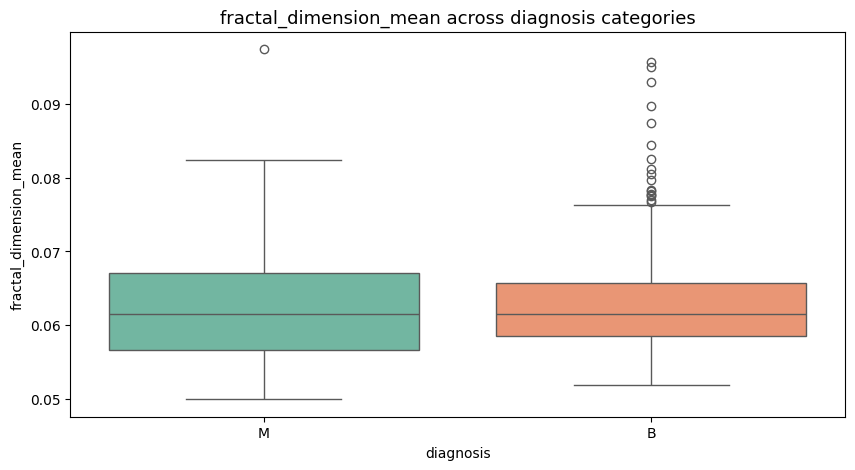

Feature: radius_se vs diagnosis
               mean       std     min     max
diagnosis                                    
B          0.284082  0.112570  0.1115  0.8811
M          0.609083  0.345039  0.1938  2.8730



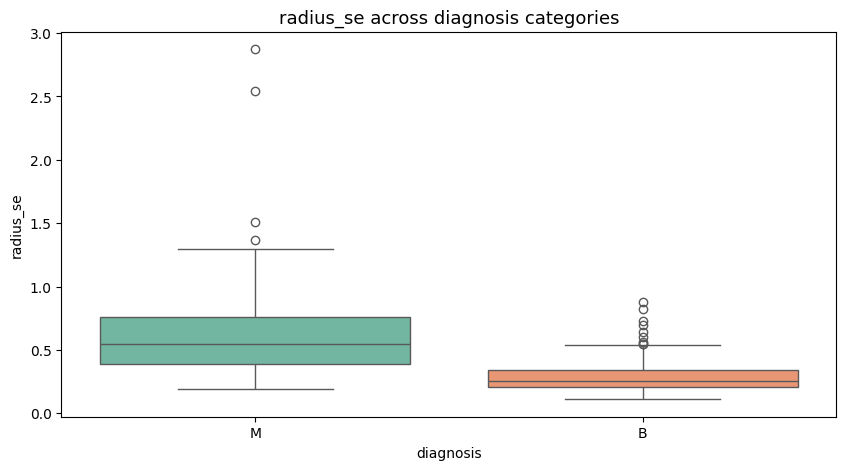

Feature: texture_se vs diagnosis
               mean       std     min    max
diagnosis                                   
B          1.220380  0.589180  0.3602  4.885
M          1.210915  0.483178  0.3621  3.568



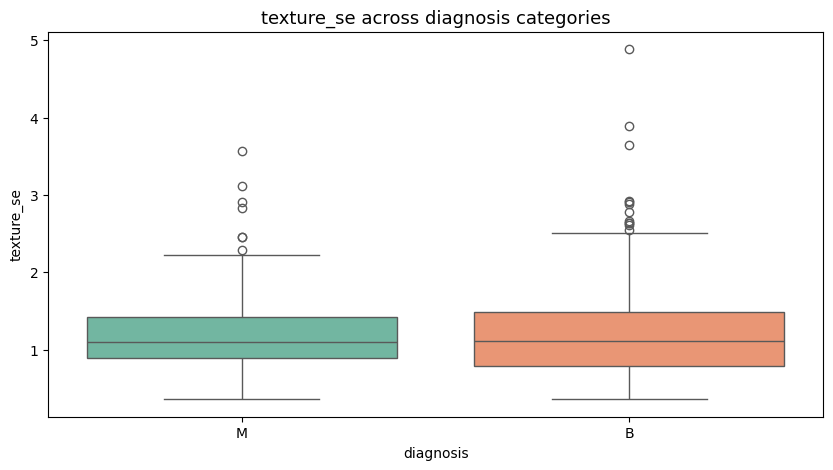

Feature: perimeter_se vs diagnosis
               mean       std    min     max
diagnosis                                   
B          2.000321  0.771169  0.757   5.118
M          4.323929  2.568546  1.334  21.980



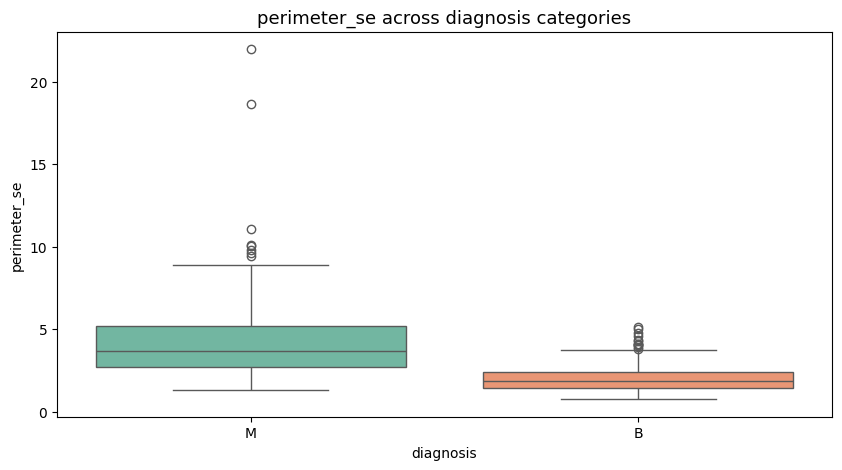

Feature: area_se vs diagnosis
                mean        std     min     max
diagnosis                                      
B          21.135148   8.843472   6.802   77.11
M          72.672406  61.355268  13.990  542.20



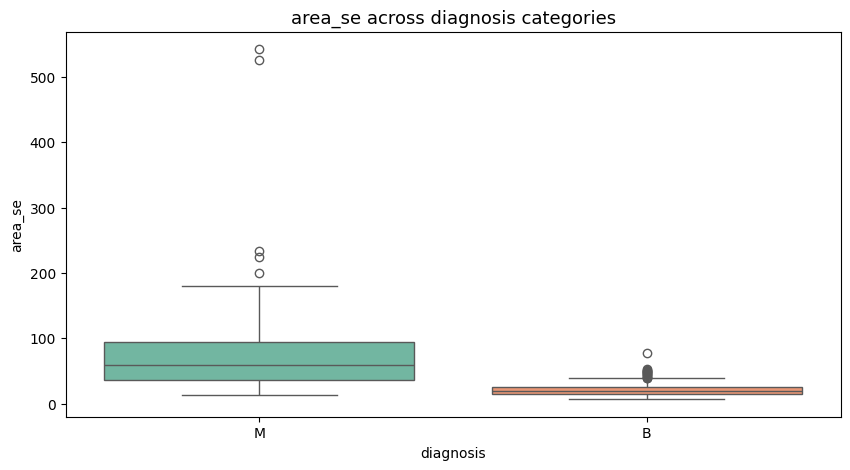

Feature: smoothness_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.007196  0.003061  0.001713  0.02177
M          0.006780  0.002890  0.002667  0.03113



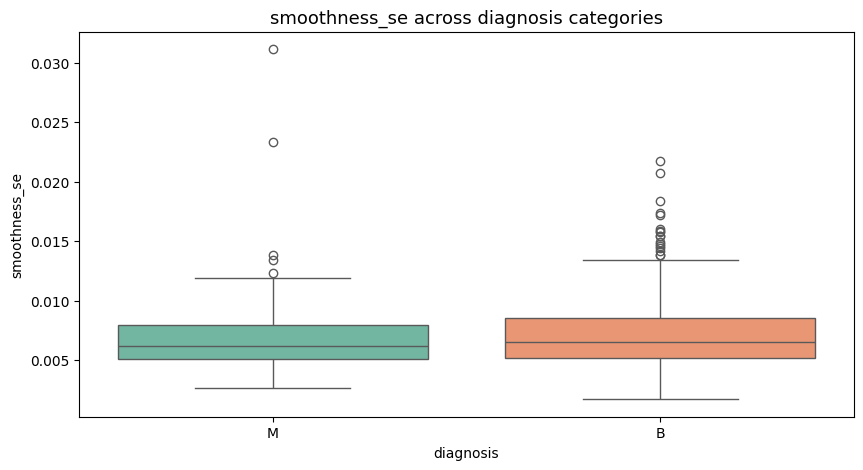

Feature: compactness_se vs diagnosis
               mean       std       min     max
diagnosis                                      
B          0.021438  0.016352  0.002252  0.1064
M          0.032281  0.018387  0.008422  0.1354



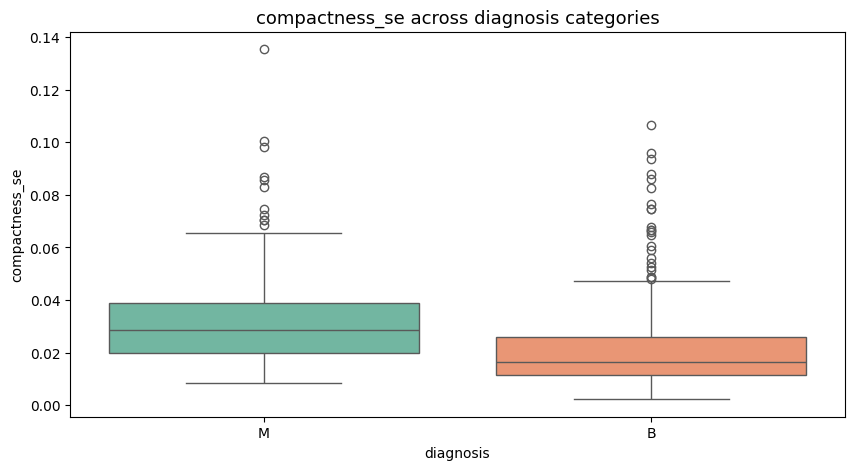

Feature: concavity_se vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.025997  0.032918  0.00000  0.3960
M          0.041824  0.021603  0.01101  0.1438



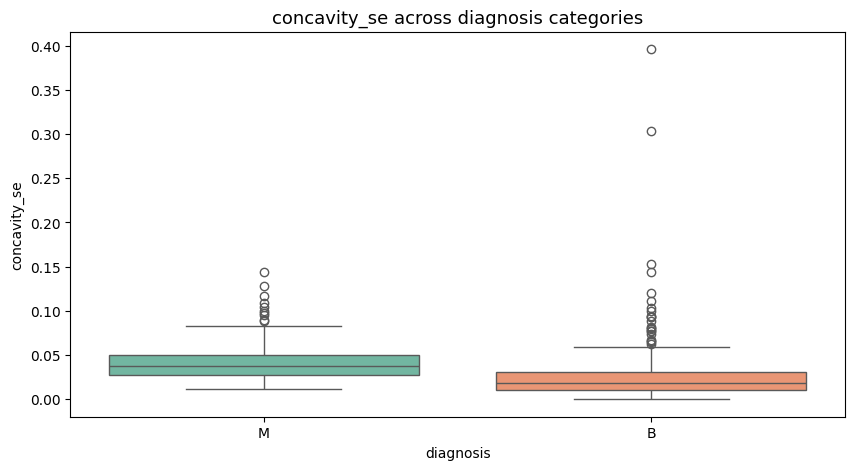

Feature: concave points_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.009858  0.005709  0.000000  0.05279
M          0.015060  0.005517  0.005174  0.04090



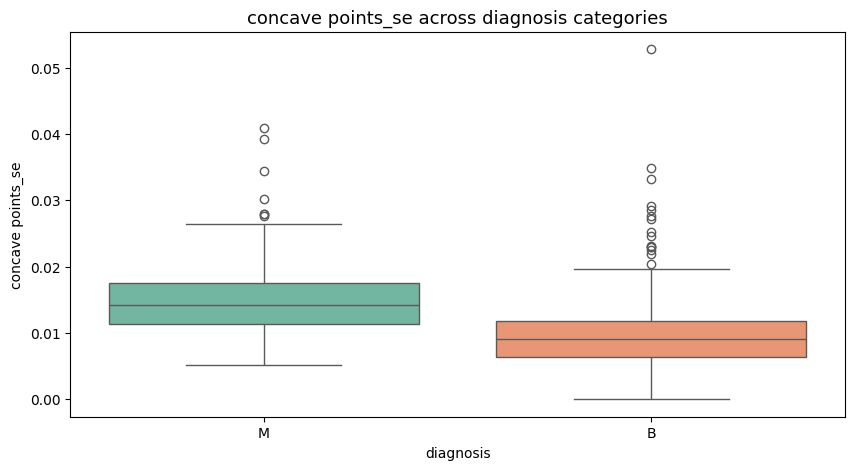

Feature: symmetry_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.020584  0.006999  0.009539  0.06146
M          0.020472  0.010065  0.007882  0.07895



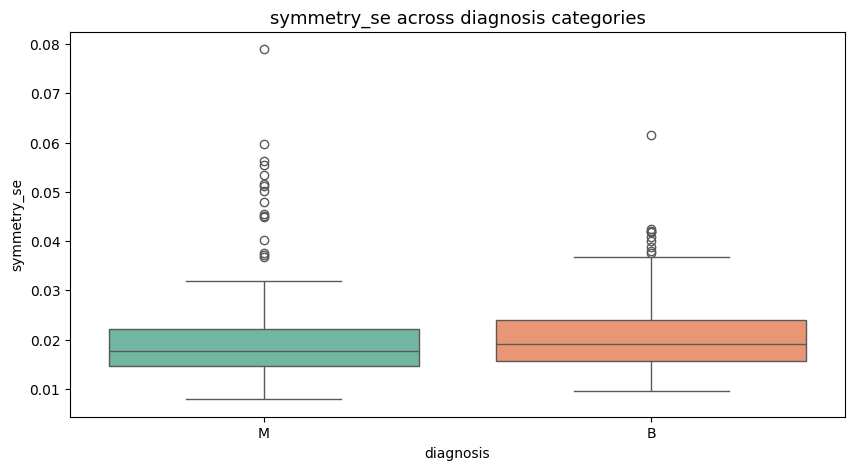

Feature: fractal_dimension_se vs diagnosis
               mean       std       min      max
diagnosis                                       
B          0.003636  0.002938  0.000895  0.02984
M          0.004062  0.002041  0.001087  0.01284



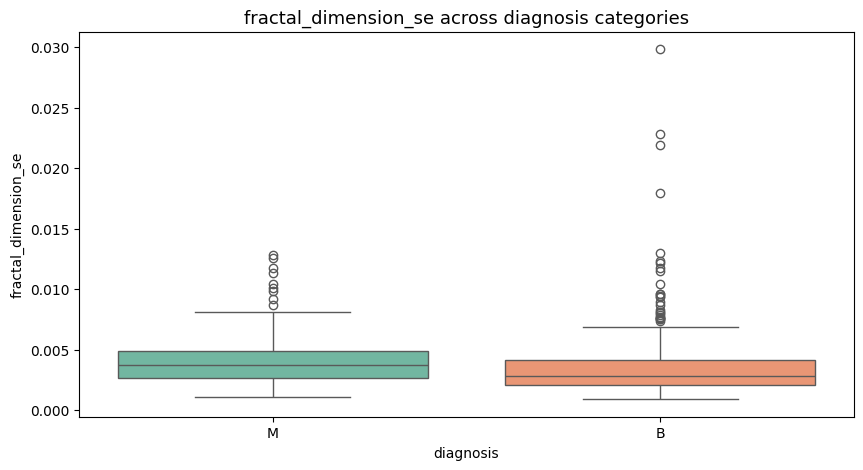

Feature: radius_worst vs diagnosis
                mean       std    min    max
diagnosis                                   
B          13.379801  1.981368   7.93  19.82
M          21.134811  4.283569  12.84  36.04



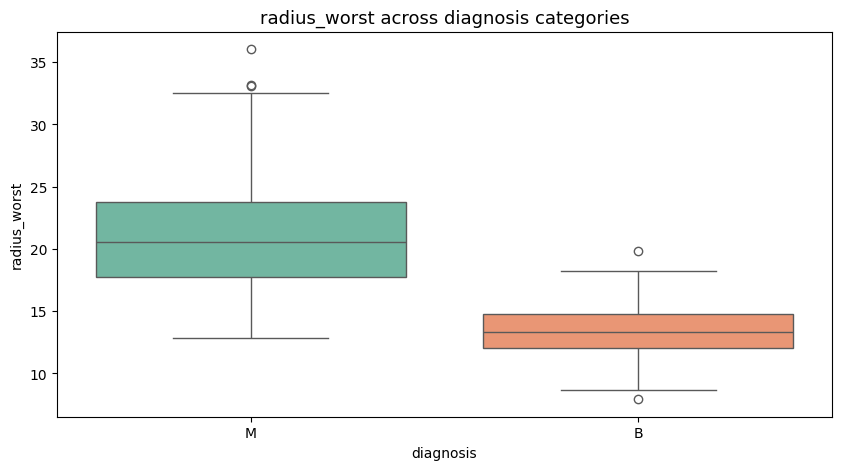

Feature: texture_worst vs diagnosis
                mean       std    min    max
diagnosis                                   
B          23.515070  5.493955  12.02  41.78
M          29.318208  5.434804  16.67  49.54



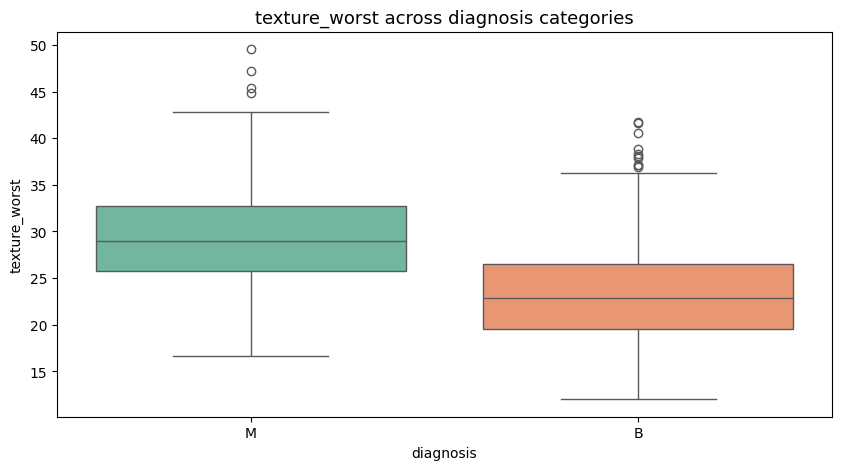

Feature: perimeter_worst vs diagnosis
                 mean        std    min    max
diagnosis                                     
B           87.005938  13.527091  50.41  127.1
M          141.370330  29.457055  85.10  251.2



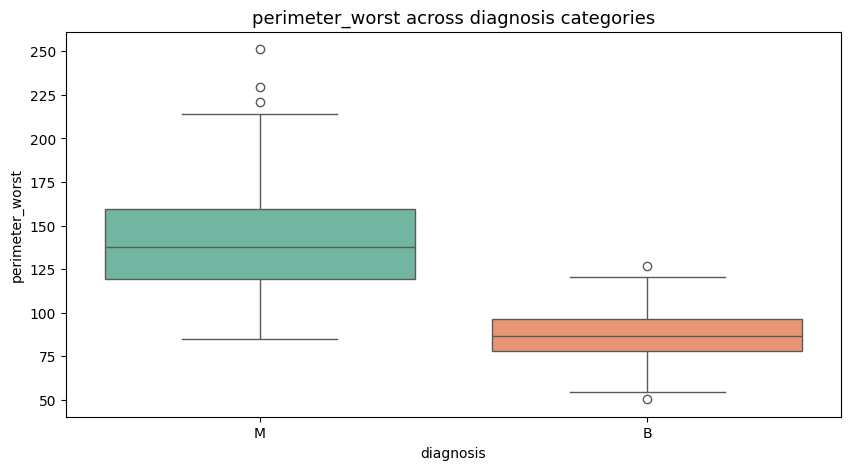

Feature: area_worst vs diagnosis
                  mean         std    min     max
diagnosis                                        
B           558.899440  163.601424  185.2  1210.0
M          1422.286321  597.967743  508.1  4254.0



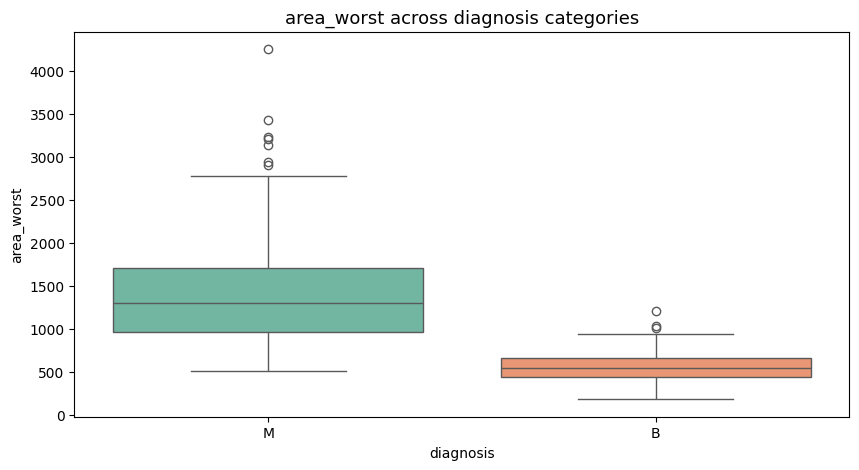

Feature: smoothness_worst vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.124959  0.020013  0.07117  0.2006
M          0.144845  0.021870  0.08822  0.2226



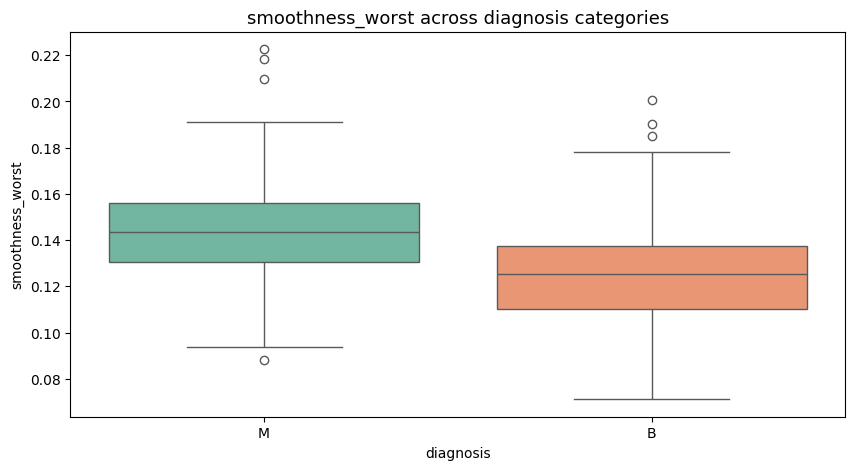

Feature: compactness_worst vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.182673  0.092180  0.02729  0.5849
M          0.374824  0.170372  0.05131  1.0580



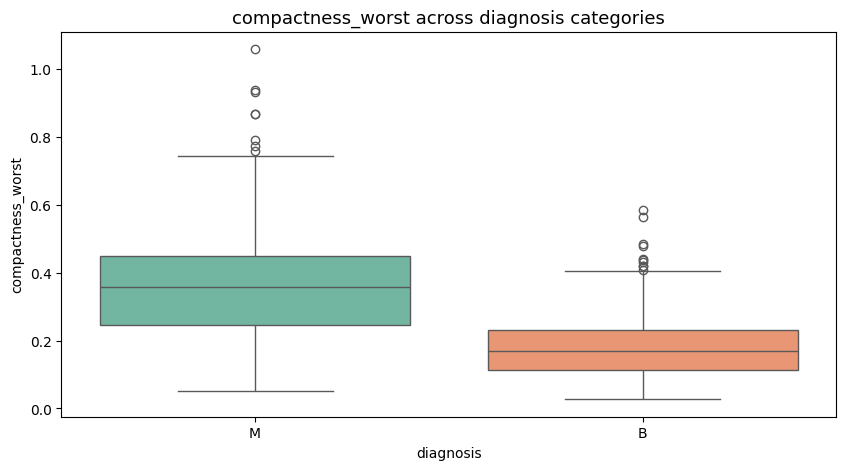

Feature: concavity_worst vs diagnosis
               mean       std      min    max
diagnosis                                    
B          0.166238  0.140368  0.00000  1.252
M          0.450606  0.181507  0.02398  1.170



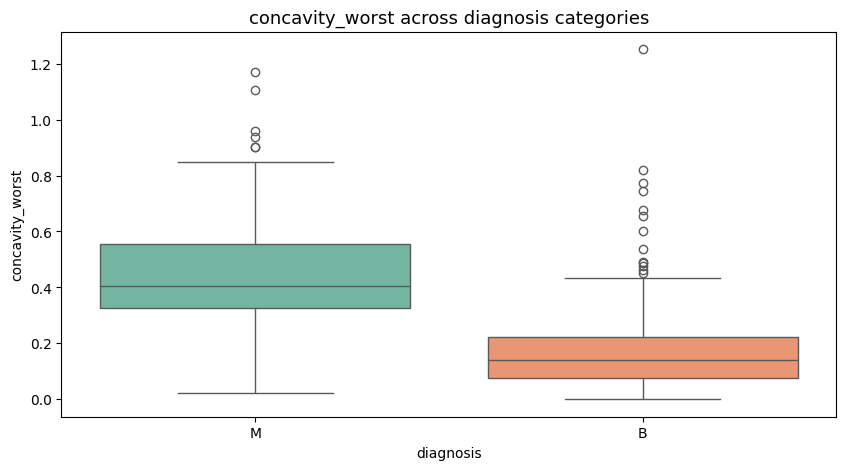

Feature: concave points_worst vs diagnosis
               mean       std      min    max
diagnosis                                    
B          0.074444  0.035797  0.00000  0.175
M          0.182237  0.046308  0.02899  0.291



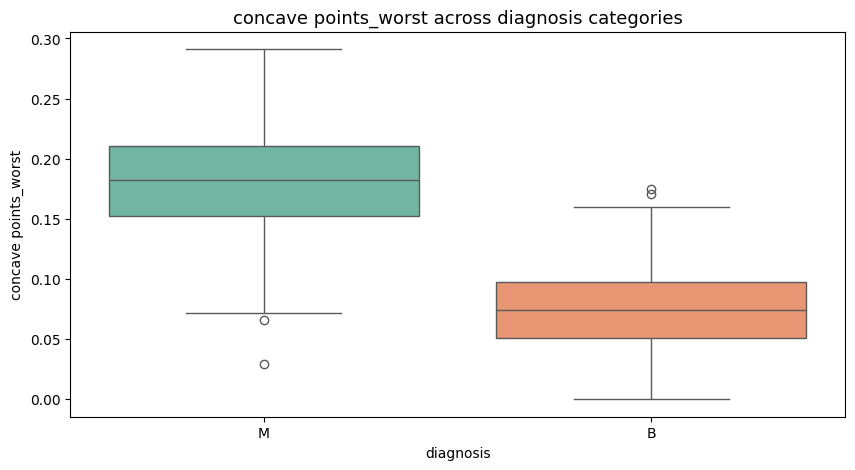

Feature: symmetry_worst vs diagnosis
               mean       std     min     max
diagnosis                                    
B          0.270246  0.041745  0.1566  0.4228
M          0.323468  0.074685  0.1565  0.6638



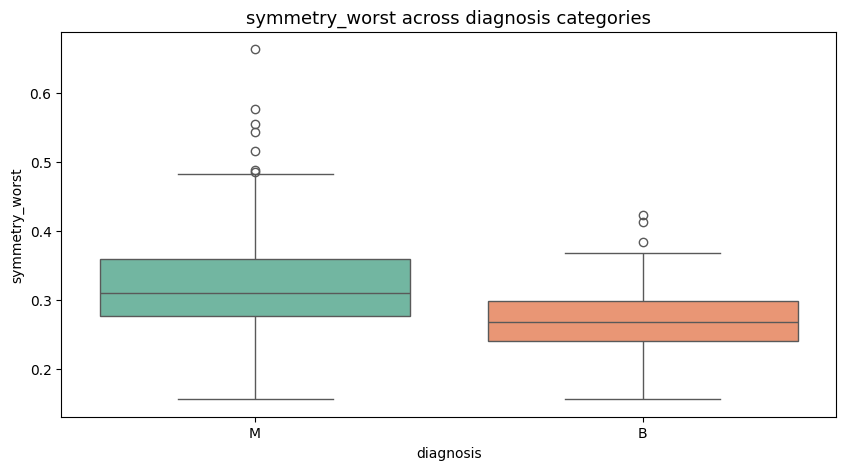

Feature: fractal_dimension_worst vs diagnosis
               mean       std      min     max
diagnosis                                     
B          0.079442  0.013804  0.05521  0.1486
M          0.091530  0.021553  0.05504  0.2075



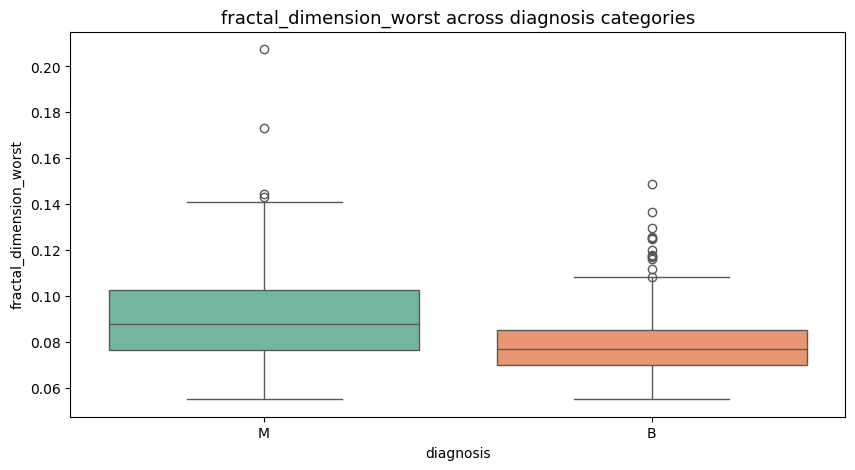

In [15]:
# Lets apply our function using loops.
for col in num_cols:
    bivariate_num_cat(breast_cancer_df, col, target='diagnosis')

#### Outliers & Missing Values

- No missing values found

- Outliers present but are expected for medical measurements(not to be removed)